# PART 1. Data Pre-processing

Fire the system

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from numpy import array
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import split
from numpy import mean
from numpy import std
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime

Read the data

In [ ]:
# download the dataset
from google.colab import drive
drive.mount("/content/drive")
# load the the file
df = pd.read_excel('/content/drive/My Drive/US.xlsx',sheet_name='US_Bulk')

Mounted at /content/drive


Data pre-processing

In [ ]:
df.head(5)

Date  Volume  Gross_Weight  Day_dif      Day  Week_Number  Months  \
0  2021-01-04   3.487         816.5        0   måndag     1.000000       1   
1  2021-01-07   3.172         585.3        3  torsdag     1.000000       1   
2  2021-01-08   2.586         481.0        1   fredag     1.142857       1   
3  2021-01-11   2.315         421.4        3   måndag     1.571429       1   
4  2021-01-12   1.271         211.0        1   tisdag     1.714286       1   

   Year  Season  Unnamed: 9      Date.1  Unnamed: 11  Unnamed: 12  \
0  2021  winter         NaN  2021.01.04            1            4   
1  2021  winter         NaN  2021.01.07            1            7   
2  2021  winter         NaN  2021.01.08            1            8   
3  2021  winter         NaN  2021.01.11            1           11   
4  2021  winter         NaN  2021.01.12            1           12   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0            4     0.571429          NaN          1.0         31.0   
1            7     1.000000          NaN          2.0         28.0   
2            8     1.142857          NaN          3.0         31.0   
3           11     1.571429          NaN          4.0         30.0   
4           12     1.714286          NaN          5.0         31.0   

   Unnamed: 18  
0         31.0  
1         59.0  
2         90.0  
3        120.0  
4        151.0

In [ ]:
# Encode the 'Season' column which contains categorical data using pandas.factorize()
df['Year_encoded'] = pd.factorize(df['Year'])[0]
df['Season_encoded'] = pd.factorize(df['Season'])[0]
df['Day_encoded'] = pd.factorize(df['Day'])[0]

In [ ]:
df.head(5)

Date  Volume  Gross_Weight  Day_dif      Day  Week_Number  Months  \
0  2021-01-04   3.487         816.5        0   måndag     1.000000       1   
1  2021-01-07   3.172         585.3        3  torsdag     1.000000       1   
2  2021-01-08   2.586         481.0        1   fredag     1.142857       1   
3  2021-01-11   2.315         421.4        3   måndag     1.571429       1   
4  2021-01-12   1.271         211.0        1   tisdag     1.714286       1   

   Year  Season  Unnamed: 9  ... Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0  2021  winter         NaN  ...           4            4     0.571429   
1  2021  winter         NaN  ...           7            7     1.000000   
2  2021  winter         NaN  ...           8            8     1.142857   
3  2021  winter         NaN  ...          11           11     1.571429   
4  2021  winter         NaN  ...          12           12     1.714286   

   Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Year_encoded  \
0          NaN          1.0         31.0         31.0             0   
1          NaN          2.0         28.0         59.0             0   
2          NaN          3.0         31.0         90.0             0   
3          NaN          4.0         30.0        120.0             0   
4          NaN          5.0         31.0        151.0             0   

   Season_encoded  Day_encoded  
0               0            0  
1               0            1  
2               0            2  
3               0            0  
4               0            3  

[5 rows x 22 columns]

In [ ]:
# Drop the 'Year', 'Season' and 'Day' columns since we have encoded columns
df=df.drop(['Year','Season','Day'], axis=1)
df.head(5)

Date  Volume  Gross_Weight  Day_dif  Week_Number  Months  Unnamed: 9  \
0  2021-01-04   3.487         816.5        0     1.000000       1         NaN   
1  2021-01-07   3.172         585.3        3     1.000000       1         NaN   
2  2021-01-08   2.586         481.0        1     1.142857       1         NaN   
3  2021-01-11   2.315         421.4        3     1.571429       1         NaN   
4  2021-01-12   1.271         211.0        1     1.714286       1         NaN   

       Date.1  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0  2021.01.04            1            4            4     0.571429   
1  2021.01.07            1            7            7     1.000000   
2  2021.01.08            1            8            8     1.142857   
3  2021.01.11            1           11           11     1.571429   
4  2021.01.12            1           12           12     1.714286   

   Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Year_encoded  \
0          NaN          1.0         31.0         31.0             0   
1          NaN          2.0         28.0         59.0             0   
2          NaN          3.0         31.0         90.0             0   
3          NaN          4.0         30.0        120.0             0   
4          NaN          5.0         31.0        151.0             0   

   Season_encoded  Day_encoded  
0               0            0  
1               0            1  
2               0            2  
3               0            0  
4               0            3

In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            456 non-null    object 
 1   Volume          456 non-null    float64
 2   Gross_Weight    456 non-null    float64
 3   Day_dif         456 non-null    int64  
 4   Week_Number     456 non-null    float64
 5   Months          456 non-null    int64  
 6   Unnamed: 9      0 non-null      float64
 7   Date.1          456 non-null    object 
 8   Unnamed: 11     456 non-null    int64  
 9   Unnamed: 12     456 non-null    int64  
 10  Unnamed: 13     456 non-null    int64  
 11  Unnamed: 14     456 non-null    float64
 12  Unnamed: 15     0 non-null      float64
 13  Unnamed: 16     12 non-null     float64
 14  Unnamed: 17     12 non-null     float64
 15  Unnamed: 18     12 non-null     float64
 16  Year_encoded    456 non-null    int64  
 17  Season_encoded  456 non-null    int

In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            456 non-null    object 
 1   Volume          456 non-null    float64
 2   Gross_Weight    456 non-null    float64
 3   Day_dif         456 non-null    int64  
 4   Week_Number     456 non-null    float64
 5   Months          456 non-null    int64  
 6   Unnamed: 9      0 non-null      float64
 7   Date.1          456 non-null    object 
 8   Unnamed: 11     456 non-null    int64  
 9   Unnamed: 12     456 non-null    int64  
 10  Unnamed: 13     456 non-null    int64  
 11  Unnamed: 14     456 non-null    float64
 12  Unnamed: 15     0 non-null      float64
 13  Unnamed: 16     12 non-null     float64
 14  Unnamed: 17     12 non-null     float64
 15  Unnamed: 18     12 non-null     float64
 16  Year_encoded    456 non-null    int64  
 17  Season_encoded  456 non-null    int

In [ ]:
print("Rows", df.shape[0])
print("Columns", df.shape[1])
print("Features", df.columns.tolist())
print("Missing values", df.isnull().any())

Rows 456
Columns 19
Features ['Date', 'Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Unnamed: 9', 'Date.1', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Year_encoded', 'Season_encoded', 'Day_encoded']
Missing values Date              False
Volume            False
Gross_Weight      False
Day_dif           False
Week_Number       False
Months            False
Unnamed: 9         True
Date.1            False
Unnamed: 11       False
Unnamed: 12       False
Unnamed: 13       False
Unnamed: 14       False
Unnamed: 15        True
Unnamed: 16        True
Unnamed: 17        True
Unnamed: 18        True
Year_encoded      False
Season_encoded    False
Day_encoded       False
dtype: bool


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

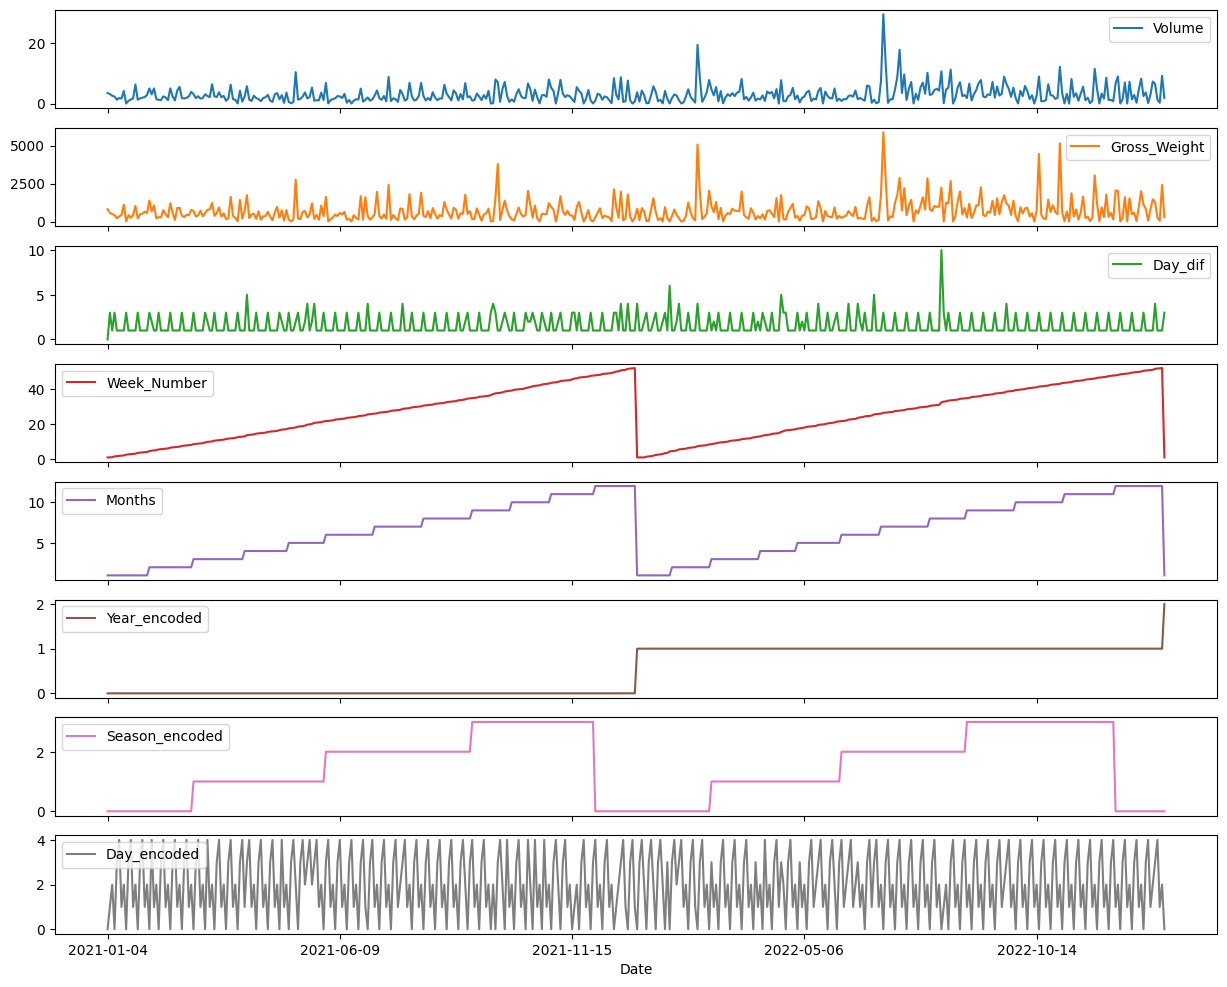

In [ ]:
# Create a plot for each of variables
df.set_index('Date')[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].plot(subplots=True,figsize=(15, 12))

In [ ]:
# All variables will be my input
df_input=df[['Date','Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]


In [ ]:
df_input.head(5)

Date  Volume  Gross_Weight  Day_dif  Week_Number  Months  \
0  2021-01-04   3.487         816.5        0     1.000000       1   
1  2021-01-07   3.172         585.3        3     1.000000       1   
2  2021-01-08   2.586         481.0        1     1.142857       1   
3  2021-01-11   2.315         421.4        3     1.571429       1   
4  2021-01-12   1.271         211.0        1     1.714286       1   

   Year_encoded  Season_encoded  Day_encoded  
0             0               0            0  
1             0               0            1  
2             0               0            2  
3             0               0            0  
4             0               0            3

In [ ]:
df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].describe()

Volume  Gross_Weight     Day_dif  Week_Number      Months  \
count  456.000000    456.000000  456.000000   456.000000  456.000000   
mean     3.009351    689.415399    1.596491    26.450501    6.598684   
std      2.897026    729.914157    1.056382    15.003977    3.442960   
min      0.006000      0.200000    0.000000     1.000000    1.000000   
25%      1.220750    230.600000    1.000000    13.000000    4.000000   
50%      2.291500    478.920000    1.000000    26.714286    7.000000   
75%      4.052500    894.062500    2.000000    39.607143   10.000000   
max     29.628000   5881.360000   10.000000    52.000000   12.000000   

       Year_encoded  Season_encoded  Day_encoded  
count    456.000000      456.000000   456.000000  
mean       0.502193        1.530702     2.008772  
std        0.504916        1.114904     1.414186  
min        0.000000        0.000000     0.000000  
25%        0.000000        1.000000     1.000000  
50%        0.500000        2.000000     2.000000  
75%        1.000000        3.000000     3.000000  
max        2.000000        3.000000     4.000000

In [ ]:
# Remove the outliers from the dataset
# Calculate the first and third quartiles
q1 = df_input['Volume'].quantile(0.25)
q3 = df_input['Volume'].quantile(0.75)

# Calculate the interquartile range
iqr = q3 - q1

# Determine the upper and lower limits for outliers
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

df_input = df_input[(df_input['Volume'] >= lower_limit) & (df_input['Volume'] <= upper_limit)]


In [ ]:
df_input

Date  Volume  Gross_Weight  Day_dif  Week_Number  Months  \
0    2021-01-04   3.487        816.50        0     1.000000       1   
1    2021-01-07   3.172        585.30        3     1.000000       1   
2    2021-01-08   2.586        481.00        1     1.142857       1   
3    2021-01-11   2.315        421.40        3     1.571429       1   
4    2021-01-12   1.271        211.00        1     1.714286       1   
..          ...     ...           ...      ...          ...     ...   
450  2022-12-23   7.321       1460.66        1    51.000000      12   
451  2022-12-27   6.536       1264.76        4    51.571429      12   
452  2022-12-28   1.335        255.20        1    51.714286      12   
453  2022-12-29   0.259         47.68        1    51.857143      12   
455  2023-01-02   1.861        277.00        3     1.000000       1   

     Year_encoded  Season_encoded  Day_encoded  
0               0               0            0  
1               0               0            1  
2               0               0            2  
3               0               0            0  
4               0               0            3  
..            ...             ...          ...  
450             1               0            2  
451             1               0            3  
452             1               0            4  
453             1               0            1  
455             2               0            0  

[435 rows x 9 columns]

In [ ]:
# Outliers are eliminated
df_input.describe()

Volume  Gross_Weight     Day_dif  Week_Number      Months  \
count  435.000000    435.000000  435.000000   435.000000  435.000000   
mean     2.593299    584.568533    1.574713    26.099179    6.519540   
std      1.959404    500.944206    0.977066    15.012052    3.446959   
min      0.006000      0.200000    0.000000     1.000000    1.000000   
25%      1.144500    220.370000    1.000000    12.785714    3.000000   
50%      2.130000    448.600000    1.000000    25.857143    6.000000   
75%      3.628500    830.600000    2.000000    39.285714   10.000000   
max      8.262000   3785.280000    6.000000    52.000000   12.000000   

       Year_encoded  Season_encoded  Day_encoded  
count    435.000000      435.000000   435.000000  
mean       0.487356        1.526437     2.016092  
std        0.504999        1.113849     1.424673  
min        0.000000        0.000000     0.000000  
25%        0.000000        1.000000     1.000000  
50%        0.000000        2.000000     2.000000  
75%        1.000000        3.000000     3.000000  
max        2.000000        3.000000     4.000000

In [ ]:
aq_corr=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']].corr(method='pearson')
aq_corr

Volume  Gross_Weight   Day_dif  Week_Number    Months  \
Volume          1.000000      0.911159  0.051248     0.084137  0.084058   
Gross_Weight    0.911159      1.000000  0.037306     0.088608  0.086008   
Day_dif         0.051248      0.037306  1.000000    -0.039913 -0.045075   
Week_Number     0.084137      0.088608 -0.039913     1.000000  0.996437   
Months          0.084058      0.086008 -0.045075     0.996437  1.000000   
Year_encoded    0.098793      0.073669  0.019431     0.030429  0.031580   
Season_encoded  0.082668      0.074534 -0.018227     0.586608  0.589346   
Day_encoded    -0.035035     -0.008963 -0.514829     0.006097  0.005332   

                Year_encoded  Season_encoded  Day_encoded  
Volume              0.098793        0.082668    -0.035035  
Gross_Weight        0.073669        0.074534    -0.008963  
Day_dif             0.019431       -0.018227    -0.514829  
Week_Number         0.030429        0.586608     0.006097  
Months              0.031580        0.589346     0.005332  
Year_encoded        1.000000        0.005716     0.005087  
Season_encoded      0.005716        1.000000    -0.002447  
Day_encoded         0.005087       -0.002447     1.000000

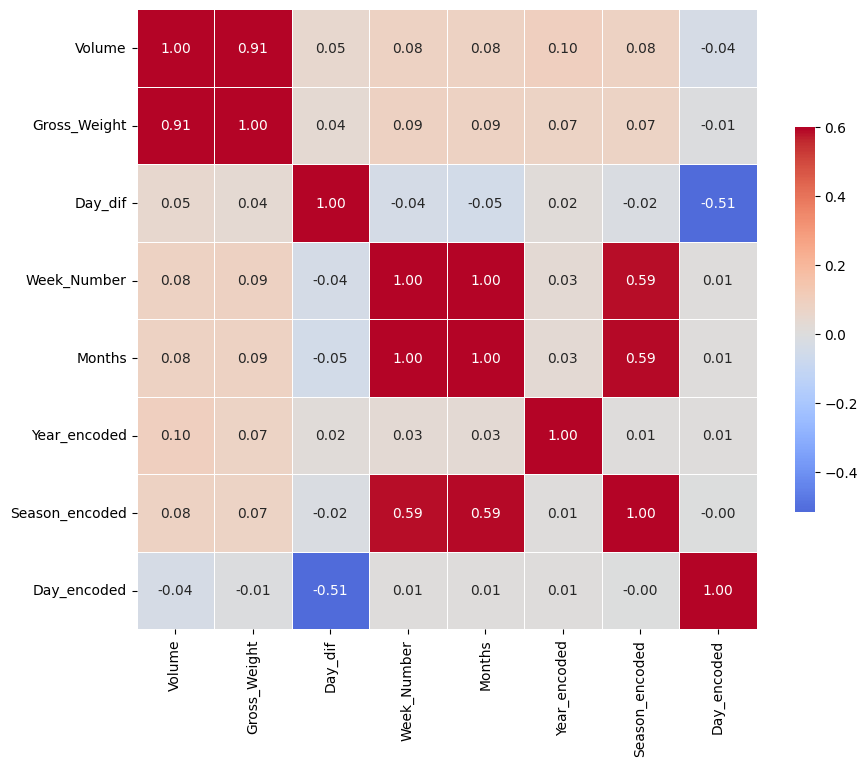

In [ ]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
pyplot.show()

In [ ]:
# standardize the dataset
#df_input=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]

#scaler= StandardScaler()
#scaler=scaler.fit(df_input)
#df_input=scaler.transform(df_input)

The function named 'split_dataset' which takes a pandas DataFrame object 'df_input' as an argument, and it returns two numpy arrays 'train' and 'test' containing the training and testing sets of the original dataset. Finally, the 'split' function of numpy restructures the training and testing sets into equal bulks. Each bulk contains equal rows. In that way, 'split' function splits the arrays along a given axis into multiple sub-arrays.

In [ ]:
# split a dataset into train/test sets
def split_dataset(df_input,t):
  train, test = df_input[0:t], df_input[t:]

  #print("trainlen",len(train))
  #print("testlen",len(test))

  # restructure bulks equally
  # by using 'split' function, dataframe is converted to numpy array from 2d to 3d
  train = array(split(train, len(train)/bulks))
  test = array(split(test, len(test)/bulks))

  #print("train",train)
  #print("test",test) 
  return train, test

This function evaluates the accuracy of a set of predicted values against their corresponding actual values. It calculates the Root Mean Squared Error (RMSE) for each day, and an overall RMSE for the entire set of predicted values.

The function takes in two numpy arrays: "actual" and "predicted". "actual" is a 2D array where each row represents a day and each column represents a variable. "predicted" is also a 2D array with the same shape as "actual". Each element in "predicted" represents the predicted value for the corresponding element in "actual".

The function first calculates the RMSE for each day by calling the "mean_squared_error" function from the "sklearn.metrics" library and then taking the square root of the result. The RMSE scores for each day are stored in a list called "scores".

Next, the function calculates an overall RMSE for the entire set of predicted values. It does this by first summing the squared differences between each predicted and actual value, and then dividing by the total number of elements in the arrays. The square root of this result gives the overall RMSE score.

Finally, the function returns both the overall RMSE and the list of RMSE scores for each day.

In [ ]:
# evaluate one or more forecasts against expected values
def evaluate_forecasts(actual, predicted):
  scores = list()
  #print("actual",actual)
  #print("predicted",predicted)
  
  # calculate an RMSE score for each day
  for i in range(actual.shape[1]):
    # calculate mse
    mse = mean_squared_error(actual[:, i], predicted[:, i])
    #print("Actual",actual[:, i])
    #print("Predicted", predicted[:, i])

    # calculate rmse
    rmse = sqrt(mse)
    # store
    scores.append(rmse)

  # calculate overall RMSE
  s = 0
  for row in range(actual.shape[0]):
    for col in range(actual.shape[1]):
      s += (actual[row, col] - predicted[row, col])**2
  score = sqrt(s / (actual.shape[0] * actual.shape[1]))

  #print("Actul shape",actual.shape)
  #print("Actul",actual)
  #print("Predicted shape",predicted.shape)
  #print("Predicted",predicted)

  return score, scores

This function summarizes the RMSE scores calculated by the "evaluate_forecasts" function. It takes in three arguments: "name" is a string that specifies the name of the model or forecast being evaluated, "score" is the overall RMSE score calculated by the "evaluate_forecasts" function, and "scores" is the list of RMSE scores calculated for each day.

The function first calculates the mean and standard deviation of the list of RMSE scores using the "mean" and "std" functions from the numpy library. It then prints a summary of the results in the format of "model name: mean RMSE (+/- standard deviation)" using the "print" function.

Finally, the function creates a box and whisker plot of the RMSE scores using the "boxplot" function from the matplotlib.pyplot library. This plot shows the distribution of the RMSE scores, including the median, quartiles, and outliers. The plot is displayed using the "show" function.

In [ ]:
# summarize scores
def summarize_scores(name, score, scores, cfg_list):
  # calculate mean and standard deviation of scores
  scores_m, score_std = mean(scores), std(scores)

  print('%s: %.3f RMSE (+/- %.3f) cfg_list %s' % (name, scores_m, score_std, cfg_list))
  # create tuple dictionary with summary information
  summary = {"name": name, "score_mean": (scores_m), "cfg_list": cfg_list}
  
  # box and whisker plot
  pyplot.boxplot(scores)
  pyplot.show()

  return summary

This 'to_supervised' function takes three arguments:

dt: a three-dimensional numpy array representing time series data

n_input: the number of time steps to use as input. we can call it as window

n_out: the number of time steps to use as output

The function first flattens the input data into a 2d array. It then defines two empty lists, X and y, to hold the input/output sequences.

The function then loops over each time step (window) in the flattened data array. For each time step, it defines the start and end indices for the input sequence (in_start and in_end) and the end indices for the output sequence (out_end). If there is enough data to form an instance with n_input input time steps and n_out output time steps, the input sequence (X) is appended to the X list and the output sequence (y) is appended to the y list.

Finally, the function returns two numpy arrays, X and y, that contain the input/output sequences.

In [ ]:
# convert history into inputs and outputs
def to_supervised(dt, n_input, n_out=5):
  # flatten data
  data_2d = dt.reshape((dt.shape[0]*dt.shape[1], dt.shape[2]))         #2d

  #print("train.shape[0] train.shape[1] train.shape[2]",dt.shape[0], dt.shape[1], dt.shape[2])
  #print("data after flatting it",data_2d)
  #print("data_2d.shape",data_2d.shape)

  X, y = list(), list()
  in_start = 0
  # step over the entire history one time step at a time
  for _ in range(len(data_2d)):
    # define the end of the input sequence. in_end and out_end indicate index number of the data
    in_end = in_start + n_input
    #print("in_end",in_end)
    out_end = in_end + n_out
    #print("out_end",out_end)
    
    # ensure we have enough data for this instance
    if out_end <= len(data_2d):
      X.append(data_2d[in_start:in_end, :])      #take all features
      y.append(data_2d[in_end:out_end, 0])       #take only the first column of the dataset as a target feature
    # move along one time step
    in_start += 1
  
  #print("array(X)", array(X))
  #print("array(y)", array(y))
  #print("array(X).shape", array(X).shape)
  #print("array(y).shape", array(y).shape)
  
  return array(X), array(y)

This code defines a function called build_model that takes three arguments:

train: a three-dimensional numpy array representing training time series data

test: a three-dimensional numpy array representing testing time series data

n_input: an integer representing the number of time steps to use as input

The function first calls the to_supervised function to convert the training and testing data into input/output sequences, which are stored in the train_x, train_y, test_x, and test_y variables.

It then defines the verbose, epochs, and batch_size parameters for training the model, as well as the number of time steps (n_timesteps), number of features (n_features), and number of outputs (n_outputs) for the input and output sequences.

The function reshapes the train_y array to have a shape of (number of samples, n_outputs, 1) in order to match the expected shape of the model output.

The function then defines a sequential model using the Keras API. The model consists of an LSTM layer with 200 units, a RepeatVector layer to repeat the output of the LSTM layer n_outputs times, another LSTM layer with 200 units that returns sequences, two TimeDistributed dense layers with 100 and 1 units respectively, and is compiled with mean squared error (MSE) loss and the Adam optimizer.

The function uses early stopping to stop training when the validation loss stops improving, and fits the model to the training data using the fit method.

After training, the function plots the training and validation loss history using pyplot from the matplotlib library, and prints a summary of the model architecture using the summary method.

Finally, the function returns the trained model, train_x, and train_y.

The pd.date_range() function is used to generate a sequence of dates based on the last date in the test_date. n_future, which is the number of future dates we want to predict. The freq='1d' argument specifies that we want to generate dates at a daily frequency.

In [ ]:
# train the model
def build_model(train, test, cfg_list, test_date):
  n_input, n_nodes, n_epochs, n_batch, patience, min_delta=cfg_list

  # prepare data
  train_x, train_y = to_supervised(train, n_input)    # array(X)==> 3d, array(y)==> 2d which comes to here

  # Here train_x is 3d but train_y is 2d but LSTMs  work with 3d data
  #print("train_x",train_x)
  #print("train_y",train_y)
  #print("test",test)
  #print("test",test.shape)

  test_x, test_y= to_supervised(test, n_input)       # array(X)==> 3d, array(y)==> 2d which come to here
  #print("test_x.shape[0]",test_x.shape[0])
  #print("test_x.shape[1]",test_x.shape[1])
  #print("test_x.shape[2]",test_x.shape[2])
  #print("test_x",test_x)
  #print("test_y",test_y)
  #print("test_x.shape",test_x.shape)
  #print("test_y.shape",test_y.shape)
  
  n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
  
  # reshape output into [samples, timesteps, features]
  # Here train_y converted from 2d to 3d before implementation of LSTM algorithm
  train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
  #print("train_y.shape[0]",train_y.shape[0])
  #print("train_y.shape[1]",train_y.shape[1])

  #print("train_x",train_x)
  #print("train_y",train_y)
  #print("train_x.shape",train_x.shape)
  #print("train_y.shape",train_y.shape)
  
  # define model
  model = Sequential()
  model.add(LSTM(n_nodes, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(RepeatVector(n_outputs))
  model.add(LSTM(n_nodes, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(100, activation='relu')))
  model.add(TimeDistributed(Dense(1)))
  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae', 'mape'])

  # fit network
  # Early Stopping
  early_stopping = EarlyStopping(patience=patience, min_delta=min_delta, monitor="val_loss", restore_best_weights=True)
  model_history= model.fit(train_x, train_y, shuffle=False, epochs=n_epochs, validation_data=(test_x, test_y), batch_size=n_batch, verbose=0, callbacks=[early_stopping])
  
  # plot metrics
  pyplot.plot(model_history.history['mse'],label='mean_squared_error')
  pyplot.plot(model_history.history['mae'],label='mean_absolute_error')
  pyplot.xlabel('epocs', fontsize=20)
  pyplot.ylabel('loss', fontsize=20)
  pyplot.legend()
  pyplot.show()

  # plot loss during training
  fig = pyplot.figure(figsize=(8, 4))
  pyplot.title('Model Loss')
  pyplot.plot(model_history.history['loss'], label='Train Loss')
  pyplot.plot(model_history.history['val_loss'], label='Test/Validation Loss')
  pyplot.xlabel('epocs', fontsize=20)
  pyplot.ylabel('loss', fontsize=20)
  pyplot.legend()
  pyplot.show()

  # print the model summary
  model.summary()
  return model, train_x, train_y, test_x

model: a machine learning model used to make predictions

history: a list of historical data used as input to the model

n_input: the number of past time steps used as input to the model

The function first flattens the history data into a 2D array and retrieves the last n_input time steps as the input data for the forecast. The input data is then reshaped into a 3D array with shape [1, n_input, n] where n is the number of features in the data. The model is used to predict the output values for the next time step based on the input data. The predicted output values are returned as a 1D array.

In [ ]:
# make a forecast
def forecast(model, history, n_input):
  #print("data history",history)
  #print("data history shape",len(history))
  
  # flatten data
  data = array(history)      
  #print("history",data)
  data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))  #2d
  #print("Flattened data",data)
  
  # retrieve last observations for input data
  input_x = data[-n_input:, :] 
  #print("input_x",input_x)        
  # reshape into [1, n_input, n]
  input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
  #print("BEFORE model",input_x)
  #print("BEFORE model shape",input_x.shape)
  
  # forecast
  yhat = model.predict(input_x, verbose=0)
  #print("yhat",yhat)
  # we only want the vector forecast
  yhat = yhat[0]
  
  return yhat

train: a 3D numpy array of historical training data

test: a 3D numpy array of historical test data

n_input: the number of past time steps used as input to the model

The function first builds a machine learning model by calling build_model function and passing in the train, test, and n_input arguments. The history variable is then initialized with a copy of the train data. The function then loops through each week of the test data and performs a walk-forward validation. It predicts the target variable using the forecast function, which takes in the machine learning model, the history data, and the n_input argument. The predicted target variable for each week is stored in the predictions list, and the real observation for each week is added to the history variable for predicting the next week. After all the predictions have been made, the function evaluates the quality of the predictions by calling evaluate_forecasts function and passing in the true test data and the predicted predictions data. The function returns a score and a list of scores for each week, as well as the predicted predictions and history data.

In [ ]:
# evaluate the model
def evaluate_model(train, test, cfg_list, test_date):
  n_input, n_nodes, n_epochs, n_batch, patience, min_delta=cfg_list
  
  # fit model
  model, train_x, train_y, test_x= build_model(train,test,cfg_list,test_date)
  #print("train_x, train_y", len(train_x), len(train_y))

  # history is a list of data.
  #print("train len",len(train))
  #print("ttrain shape",train.shape)
  #print("test len",len(test))
  history = [x for x in train]
  #print("history_begining",history)          #this history variable includes only train
  #print("history_begining len",len(history))  

  # walk-forward validation
  test_history= list()
  test_predictions = list()
  for i in range(len(test)):
    test_history.append(test[i, :])
    # prediction
    yhat_sequence = forecast(model, test_history, n_input)    #predicted target variables
    # store the predictions
    test_predictions.append(yhat_sequence)
  
  test_predictions = array(test_predictions)

  predicted_test_1d=list()
  for i in test_predictions:
    predicted_test_1d.extend(i)

  score, scores = evaluate_forecasts(test[:, :, 0], test_predictions)

  # Dimension of the prediction variable is reduced from 2d to 1d
  test_1d=test[:,:,0]

  actual_1d=list()
  for i in test_1d:
    actual_1d.extend(i)
  
  #print("actual",actual_1d)
  #print("predicted_test_1d",predicted_test_1d)

  # Generate list of sequence of days for predictions of future. Weekdays are generated only. 'B' represents the business days
  n_future=10
  forecast_period_dates=pd.date_range(list(test_date)[-1],periods=n_future,freq='B').tolist()
  # Extracting only the date part using the `date()` method
  forecast_period_dates = [d.date() for d in forecast_period_dates]
  #print("datelist_future_",forecast_period_dates)
  
  # future forecast
  future_forecast=model.predict(test_x[-2:])
  # flatten the array to remove extra dimensions
  future_forecast = future_forecast.flatten()

  #forecast=model.predict(test_x[-n_future:])
  print("future_forecast",future_forecast)

  print("predicted_test_1d len",len(predicted_test_1d))
  print("Actual len",len(actual_1d))

  # plotting
  plt.figure(figsize=(10, 4))
  plt.title("Actual-Predicted")
  plt.xlabel("Records")
  plt.ylabel("Volume (M3)")
  plt.plot(test_date,actual_1d, label='Actual Test Data', color ="green")
  plt.plot(test_date,predicted_test_1d, label='Predictions', color ="red")
  #plt.plot(num_dates,future_forecast, label='Future Predictions', color ="blue")
  days = ['1st', '2nd', '3rd', '4th', '5th','6st', '7nd', '8th', '9th', '10th']
  x= [i for i in days]
  plt.plot(x, future_forecast, label='Future Predictions', color ="blue")

  plt.legend()
  plt.show()

  return score, scores, predicted_test_1d, model, cfg_list

In [ ]:
# create a list of configs to tune hyperparameter
def model_configs():
  # define scope of configs
  n_input = [3,5]
  n_nodes = [100,200]
  n_epochs = [100]
  n_batch = [16,32]
  patience= [5, 10]
  min_delta= [0.001, 0.0001]
  # create configs
  configs = list()
  for i in n_input:
    for j in n_nodes:
      for k in n_epochs:
        for l in n_batch:
          for m in patience:
            for n in min_delta:
              cfg = [i, j, k, l, m, n]
              configs.append(cfg)
  print('Total configs: %d' % len(configs))
  return configs

Total configs: 32


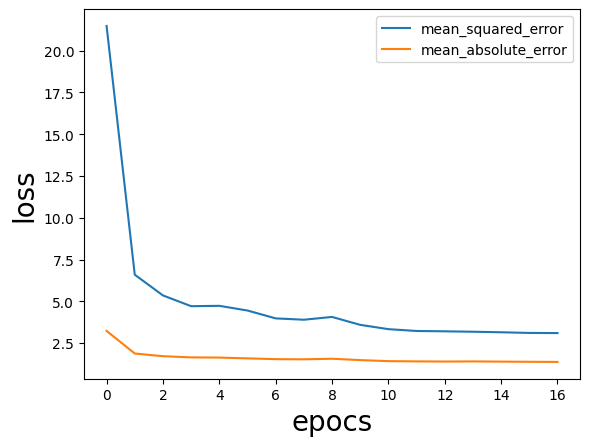

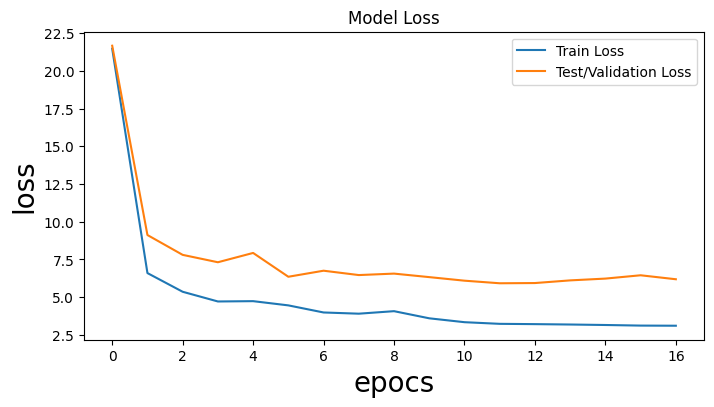

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43600     
                                                                 
 repeat_vector (RepeatVector  (None, 5, 100)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 time_distributed (TimeDistr  (None, 5, 100)           10100     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 5, 1)             101       
 tributed)                                                       
                                                        

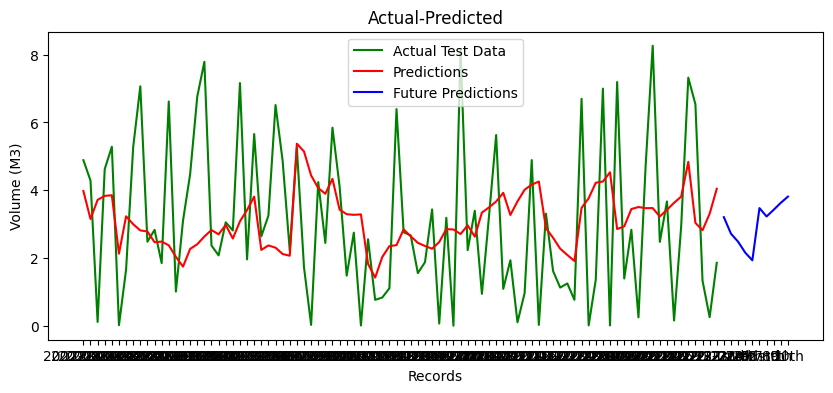

hello
LSTM: 2.377 RMSE (+/- 0.283) cfg_list [3, 100, 100, 16, 5, 0.001]
hello


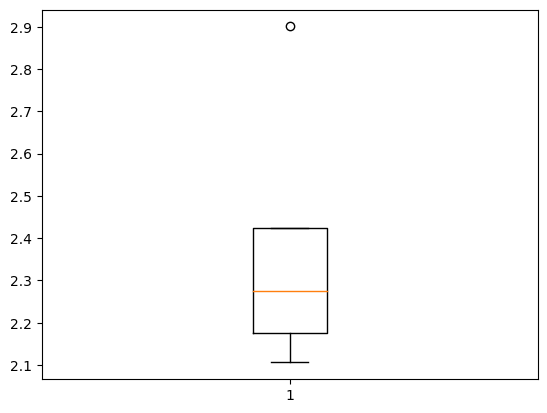

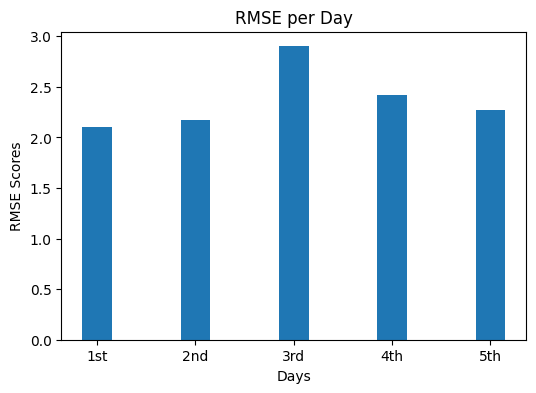

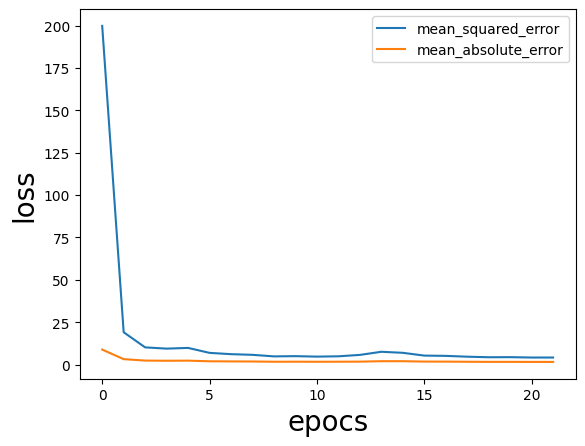

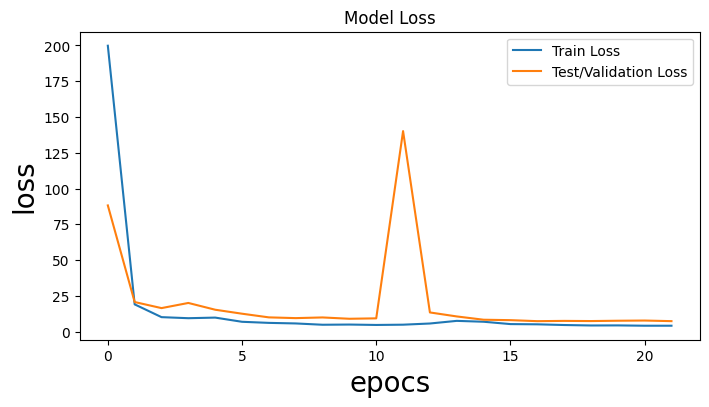

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               43600     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 5, 100)            80400     
                                                                 
 time_distributed_2 (TimeDis  (None, 5, 100)           10100     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 5, 1)             101       
 tributed)                                                       
                                                      

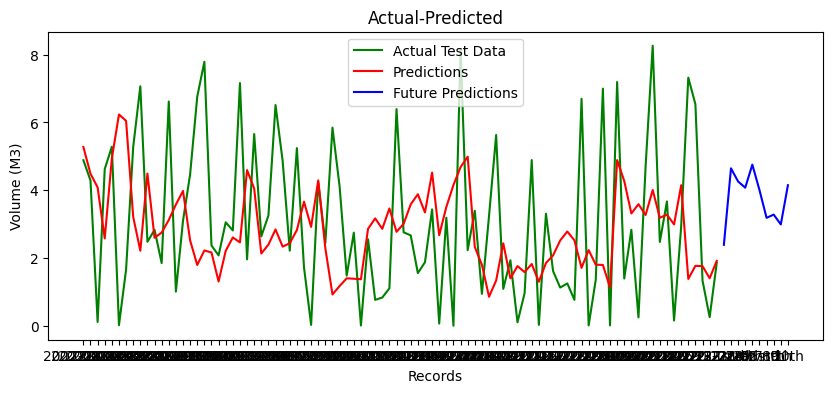

hello
LSTM: 2.536 RMSE (+/- 0.536) cfg_list [3, 100, 100, 16, 5, 0.0001]
hello


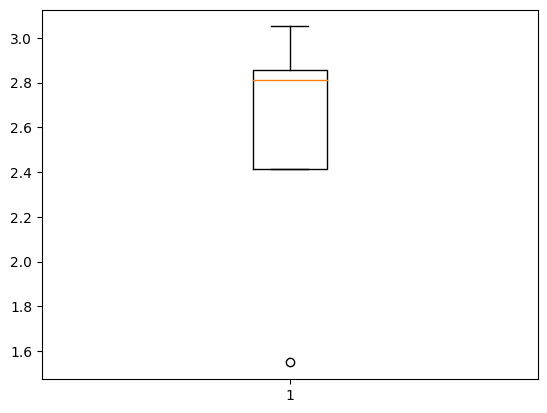

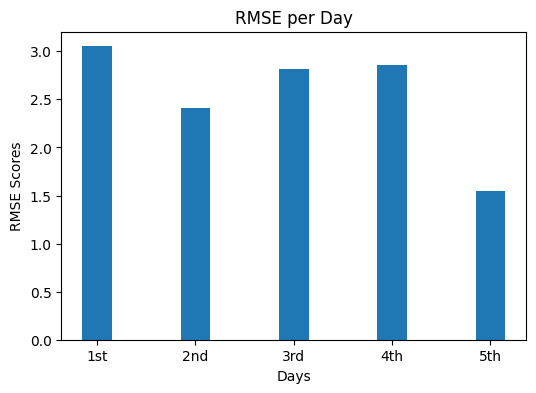

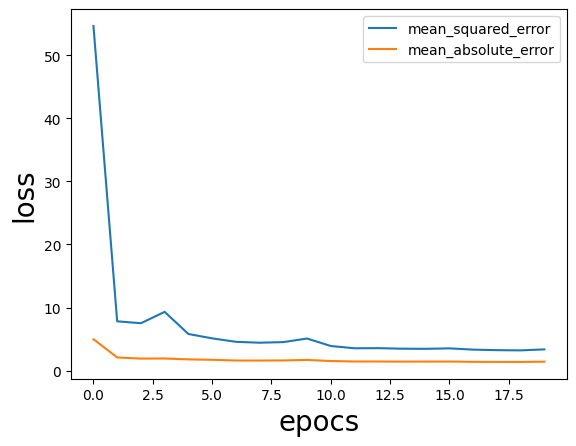

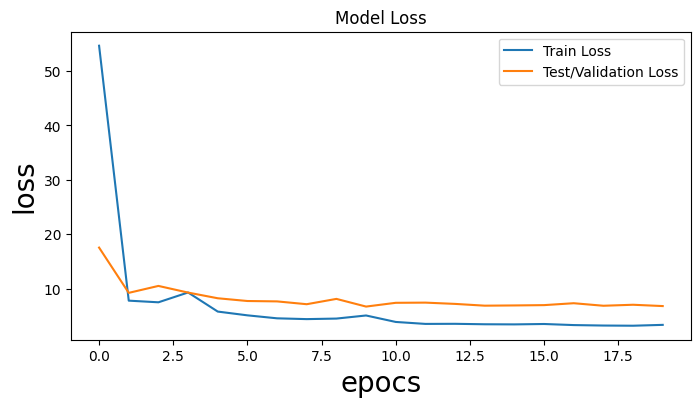

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               43600     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 5, 100)            80400     
                                                                 
 time_distributed_4 (TimeDis  (None, 5, 100)           10100     
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 5, 1)             101       
 tributed)                                                       
                                                      

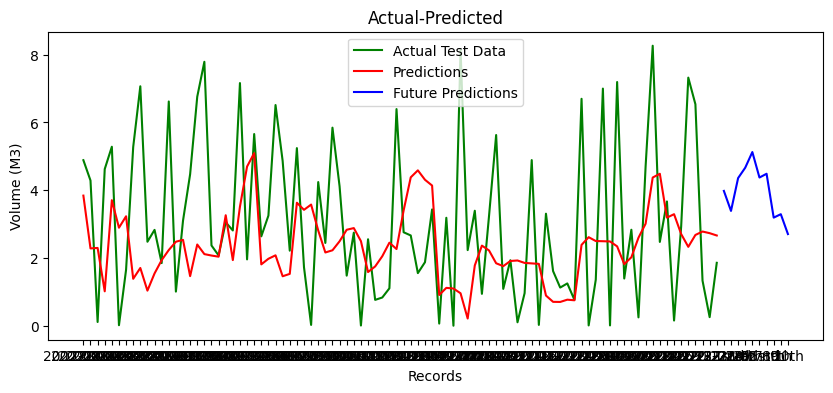

hello
LSTM: 2.463 RMSE (+/- 0.577) cfg_list [3, 100, 100, 16, 10, 0.001]
hello


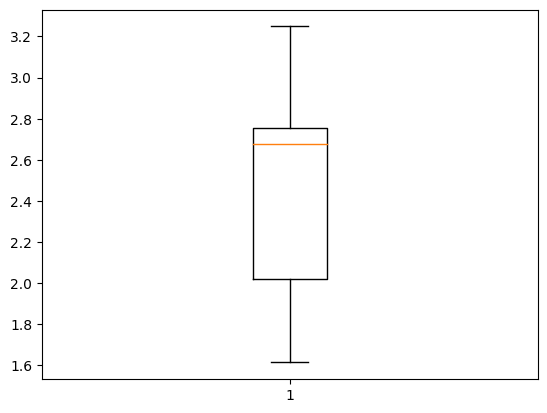

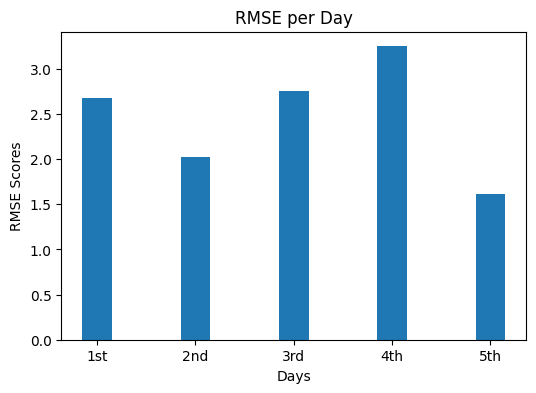

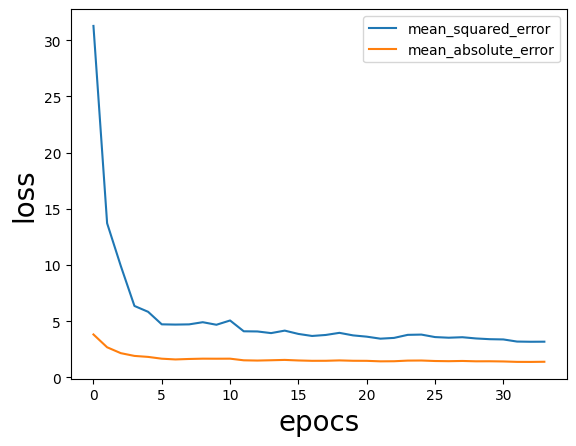

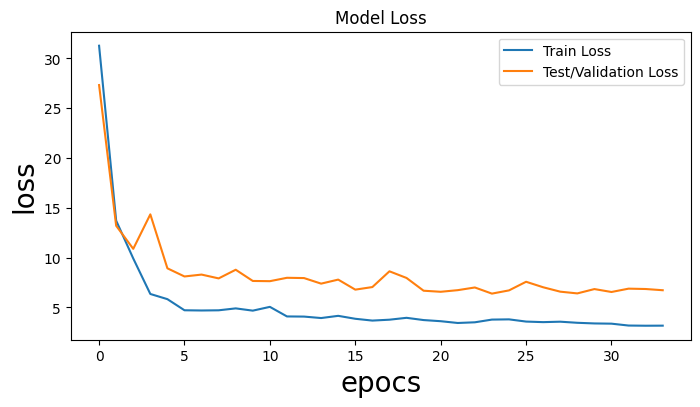

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100)               43600     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 5, 100)            80400     
                                                                 
 time_distributed_6 (TimeDis  (None, 5, 100)           10100     
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 5, 1)             101       
 tributed)                                                       
                                                      

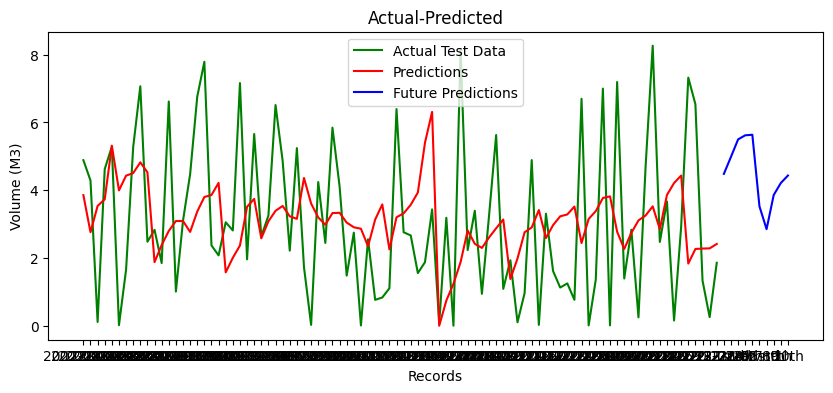

hello
LSTM: 2.417 RMSE (+/- 0.246) cfg_list [3, 100, 100, 16, 10, 0.0001]
hello


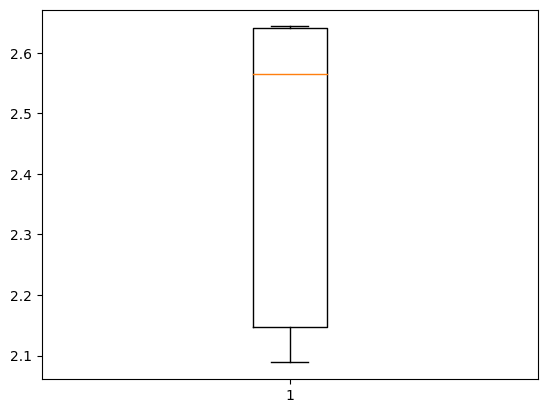

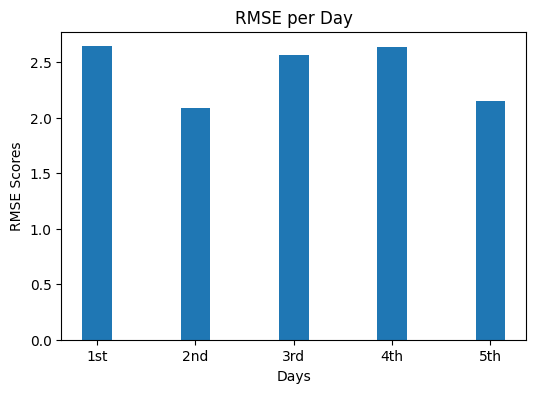

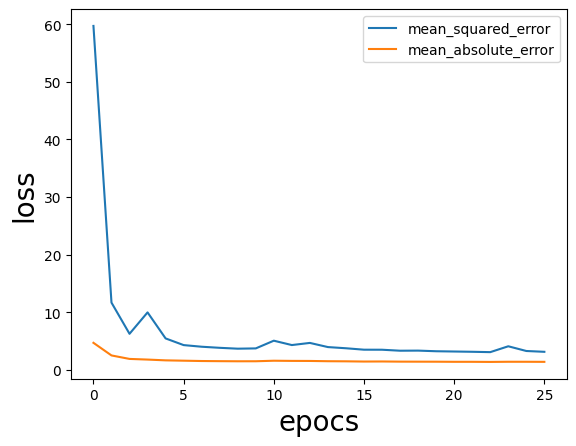

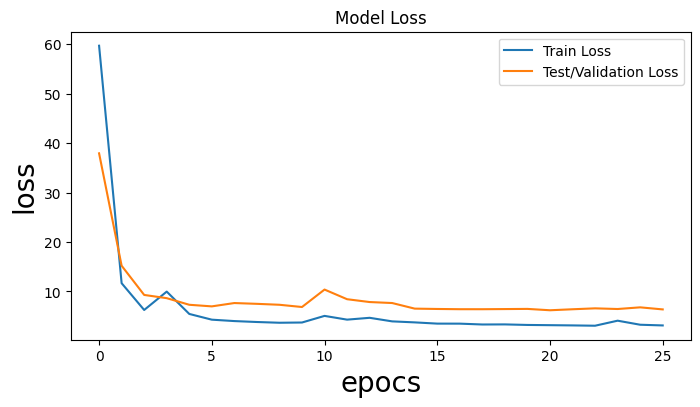

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               43600     
                                                                 
 repeat_vector_4 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 5, 100)            80400     
                                                                 
 time_distributed_8 (TimeDis  (None, 5, 100)           10100     
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 5, 1)             101       
 tributed)                                                       
                                                      

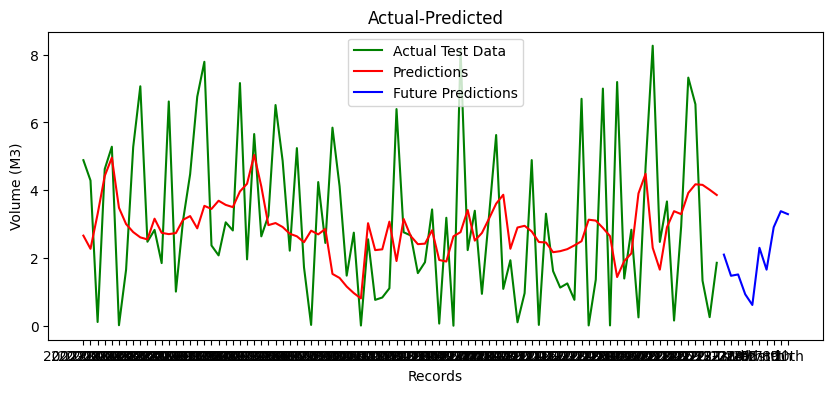

hello
LSTM: 2.327 RMSE (+/- 0.468) cfg_list [3, 100, 100, 32, 5, 0.001]
hello


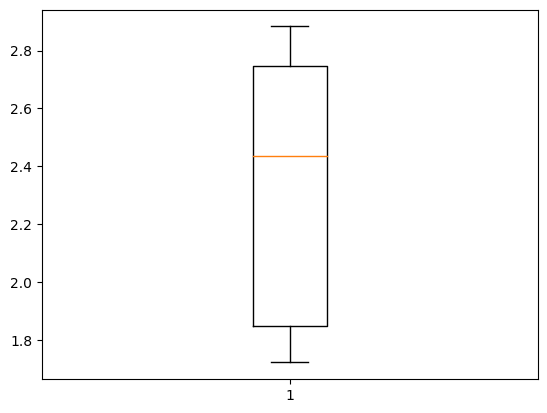

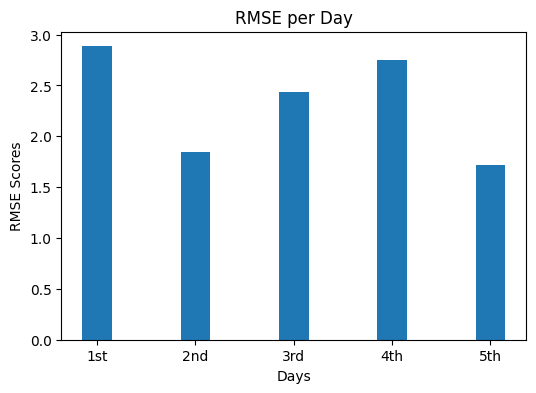

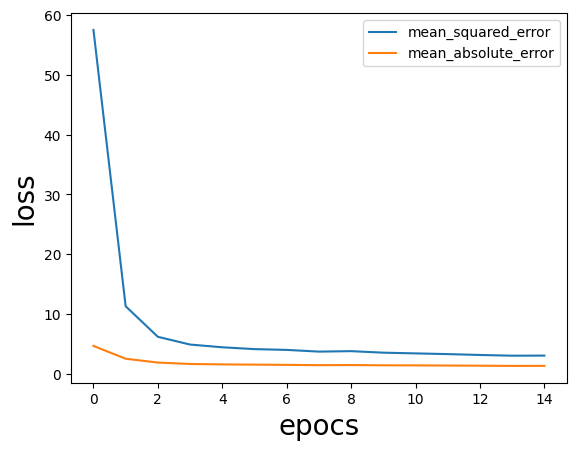

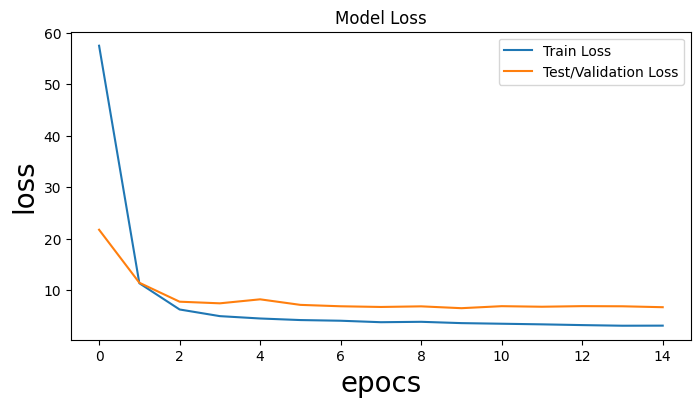

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_5 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_11 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_10 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                      

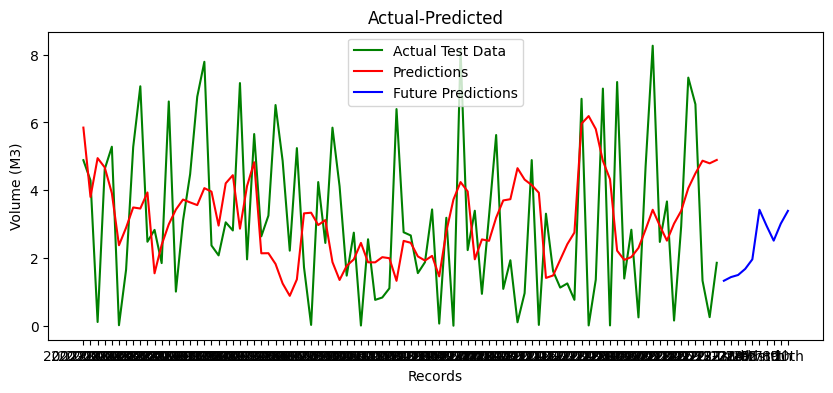

hello
LSTM: 2.517 RMSE (+/- 0.273) cfg_list [3, 100, 100, 32, 5, 0.0001]
hello


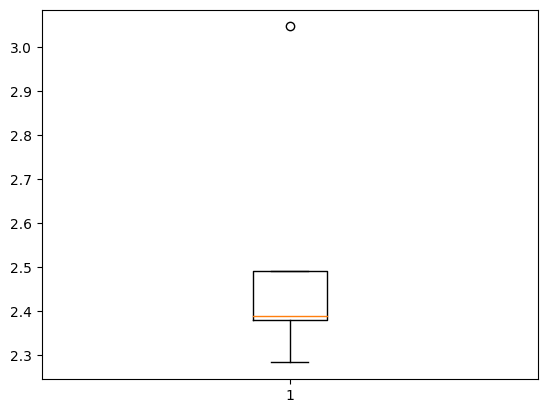

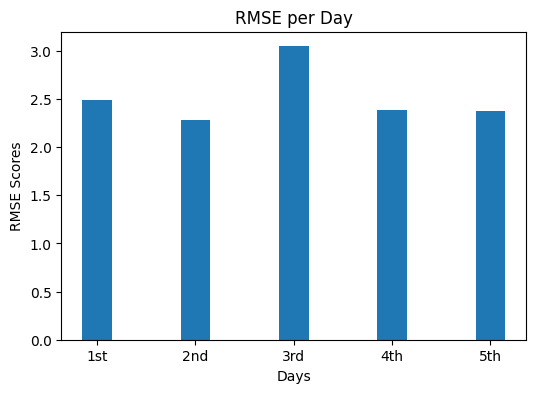

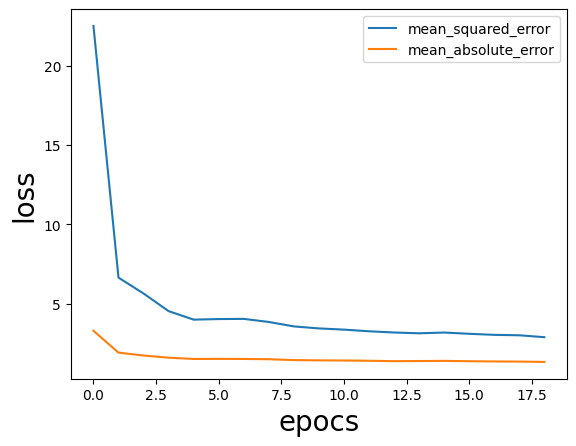

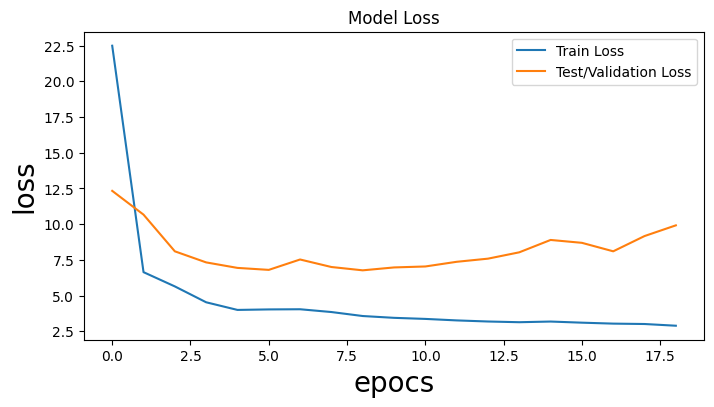

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_6 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_12 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                      

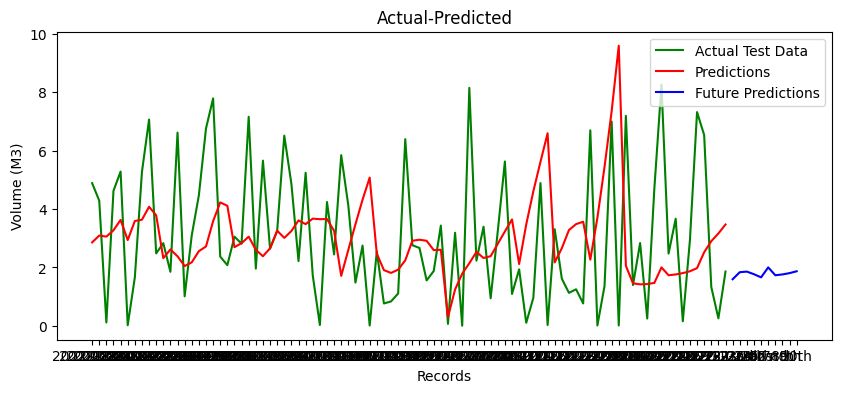

hello
LSTM: 2.704 RMSE (+/- 0.551) cfg_list [3, 100, 100, 32, 10, 0.001]
hello


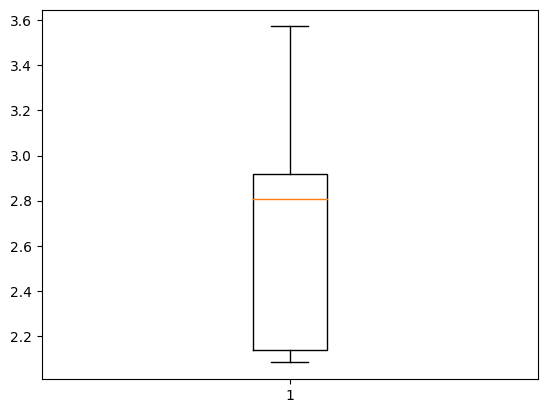

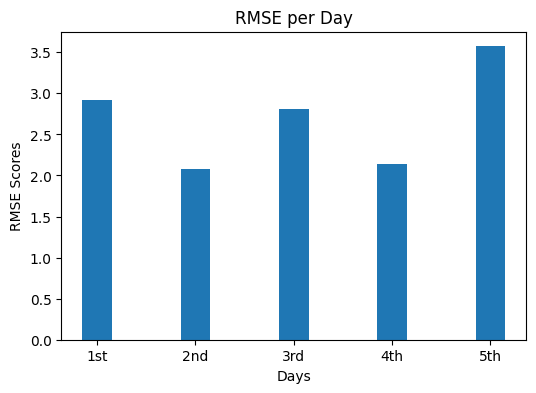

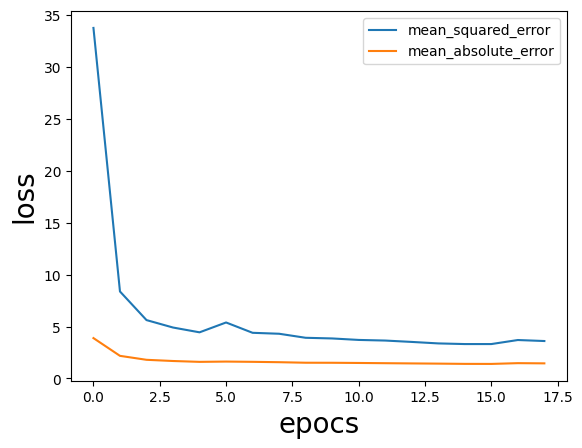

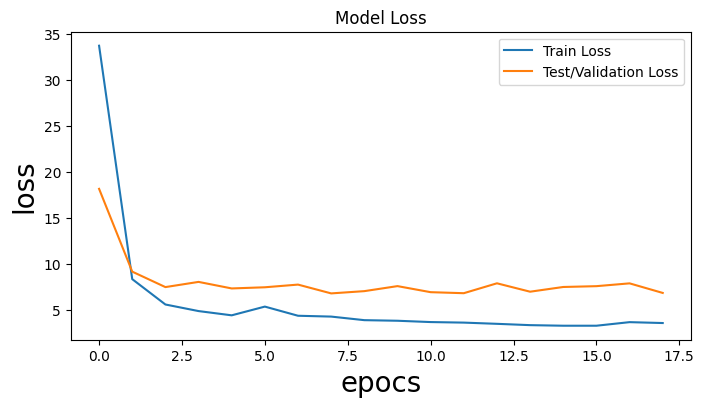

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 5, 100)           0         
 or)                                                             
                                                                 
 lstm_15 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_14 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                      

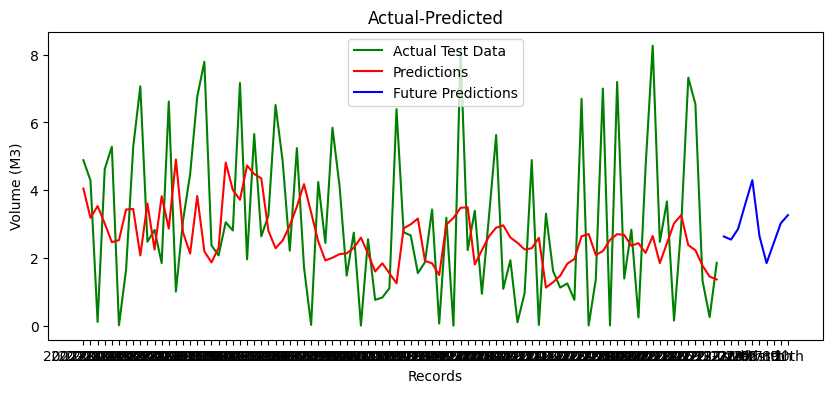

hello
LSTM: 2.398 RMSE (+/- 0.369) cfg_list [3, 100, 100, 32, 10, 0.0001]
hello


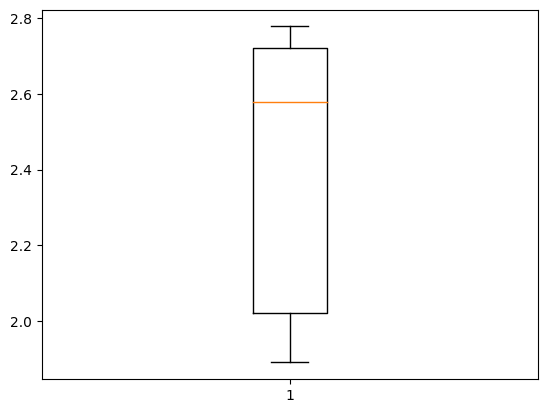

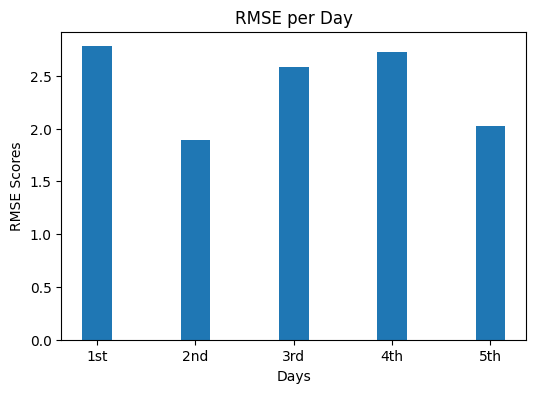

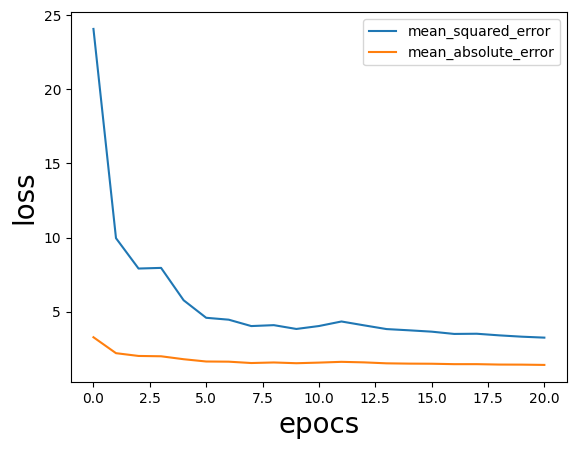

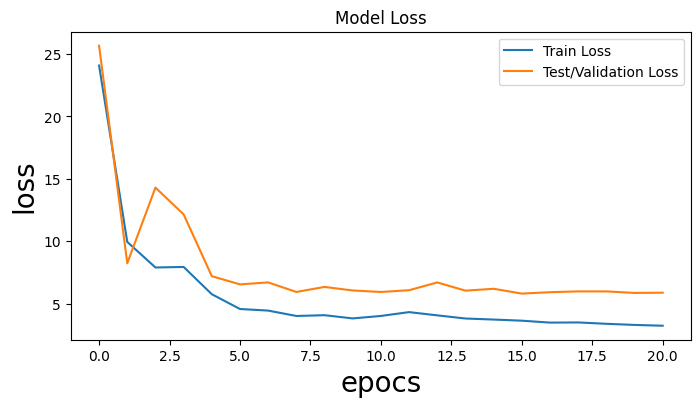

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_8 (RepeatVect  (None, 5, 200)           0         
 or)                                                             
                                                                 
 lstm_17 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_16 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                      

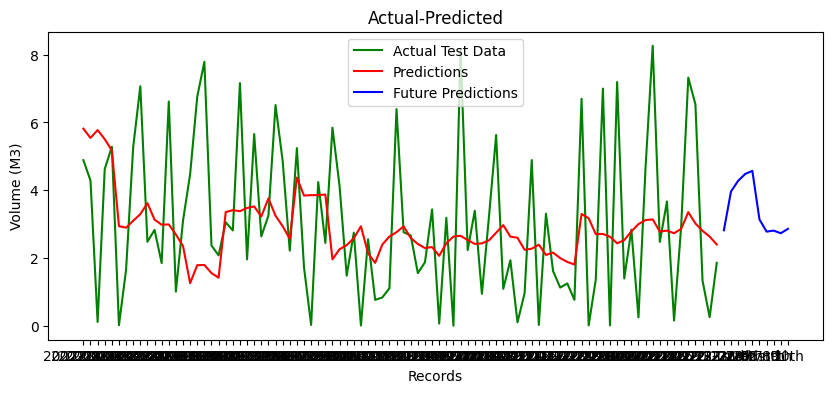

hello
LSTM: 2.316 RMSE (+/- 0.410) cfg_list [3, 200, 100, 16, 5, 0.001]
hello


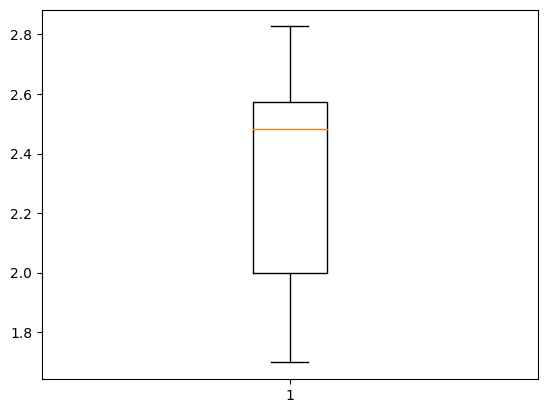

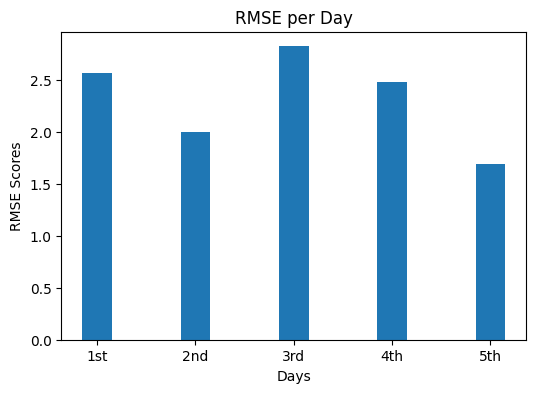

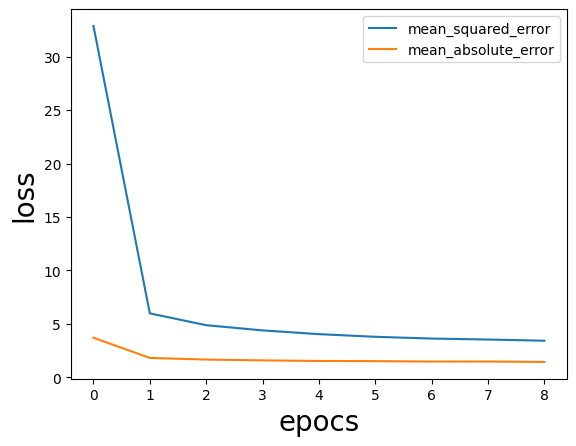

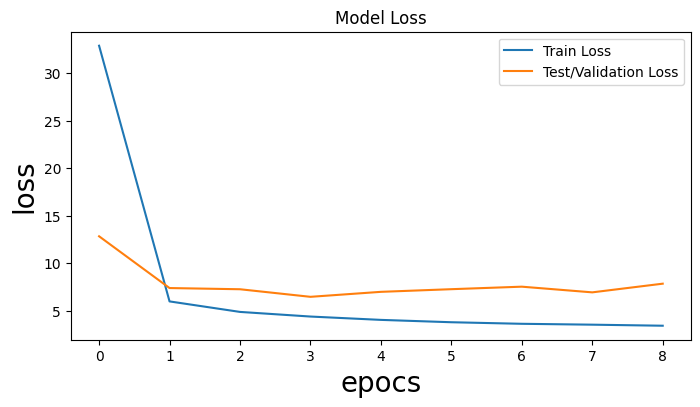

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_9 (RepeatVect  (None, 5, 200)           0         
 or)                                                             
                                                                 
 lstm_19 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_18 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                      

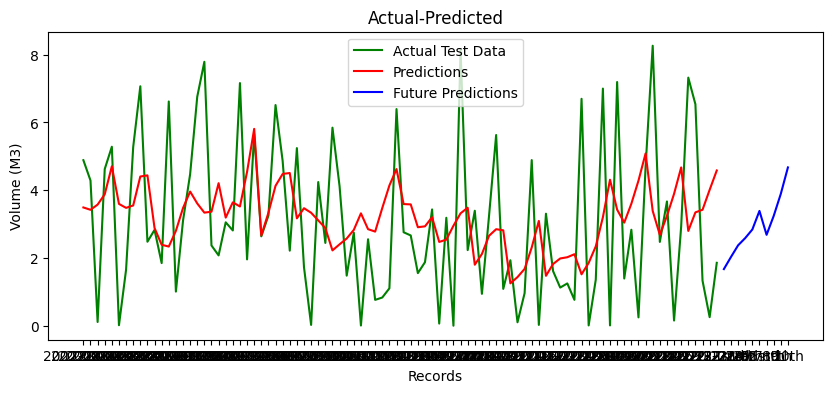

hello
LSTM: 2.285 RMSE (+/- 0.421) cfg_list [3, 200, 100, 16, 5, 0.0001]
hello


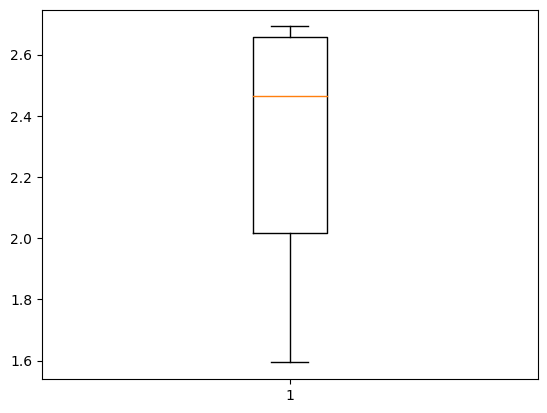

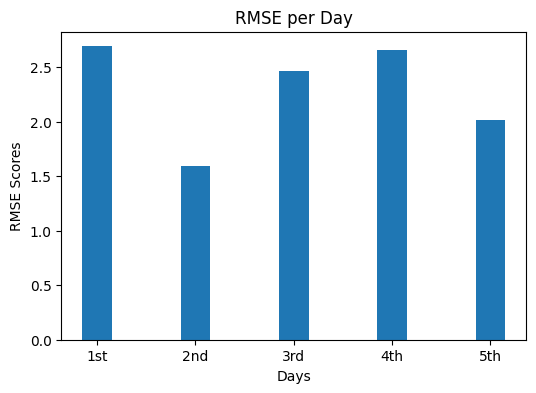

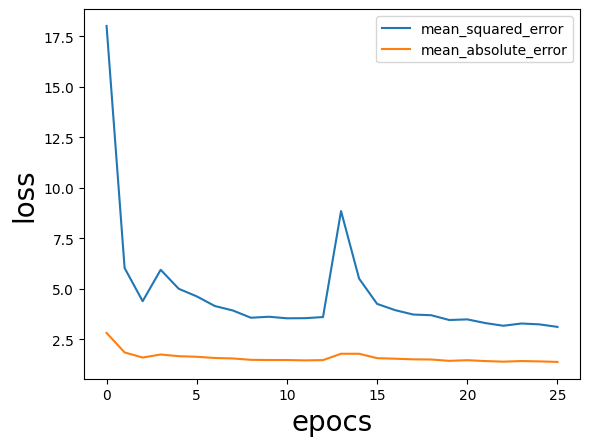

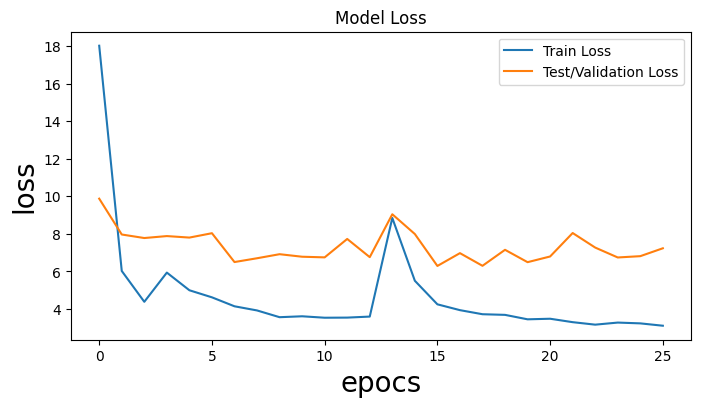

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_10 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_21 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_20 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

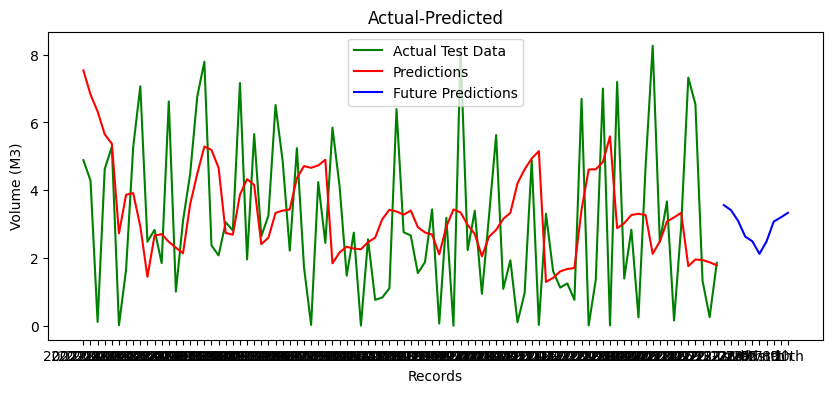

hello
LSTM: 2.541 RMSE (+/- 0.253) cfg_list [3, 200, 100, 16, 10, 0.001]
hello


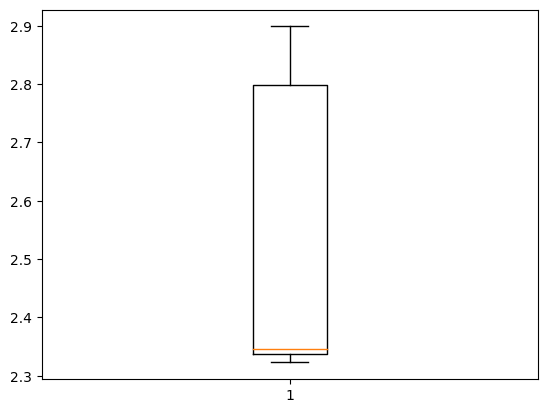

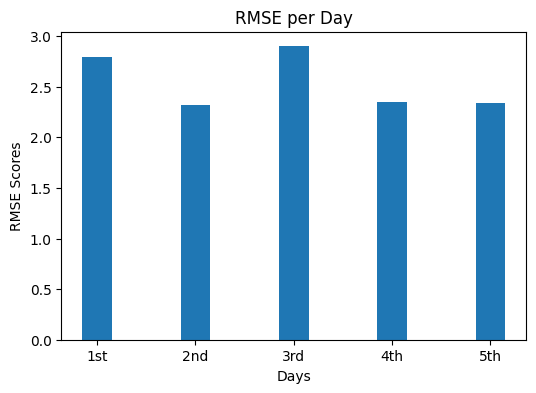

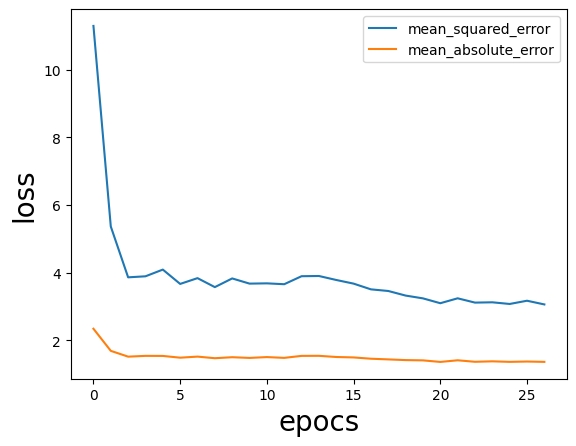

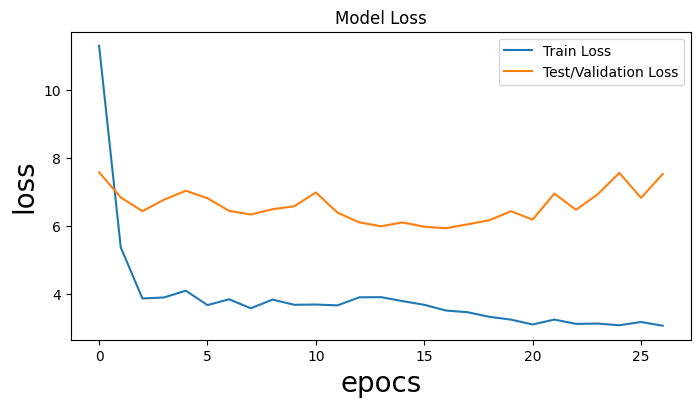

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_11 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_23 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_22 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

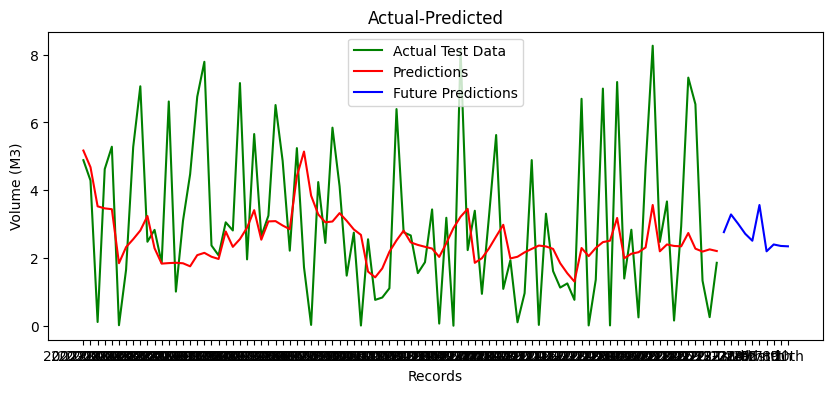

hello
LSTM: 2.251 RMSE (+/- 0.366) cfg_list [3, 200, 100, 16, 10, 0.0001]
hello


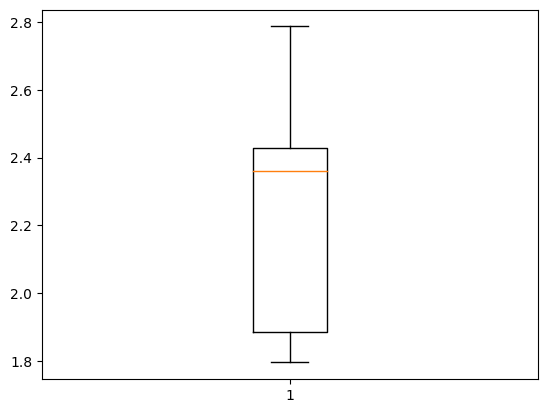

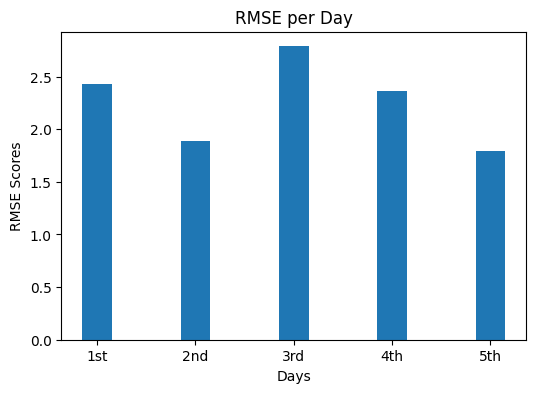

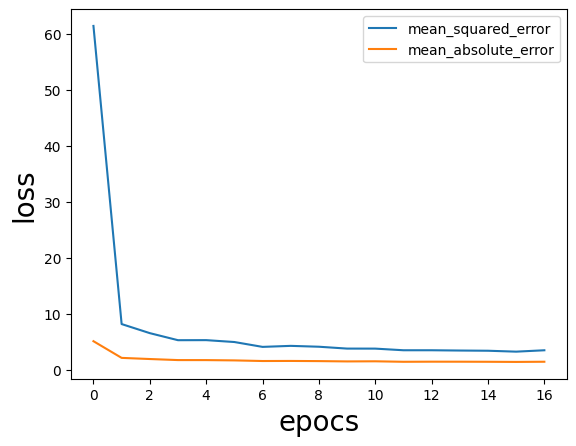

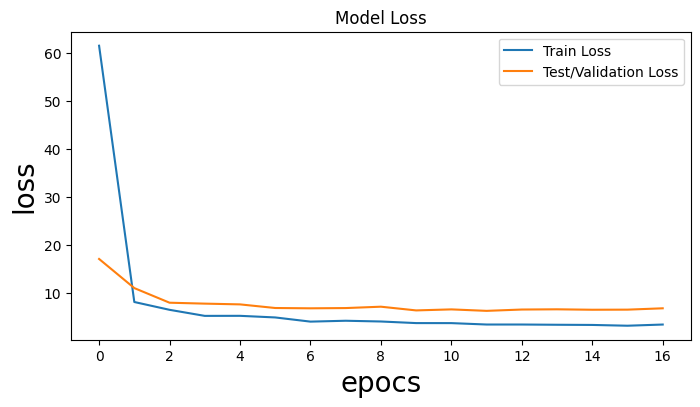

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_12 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_25 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_24 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

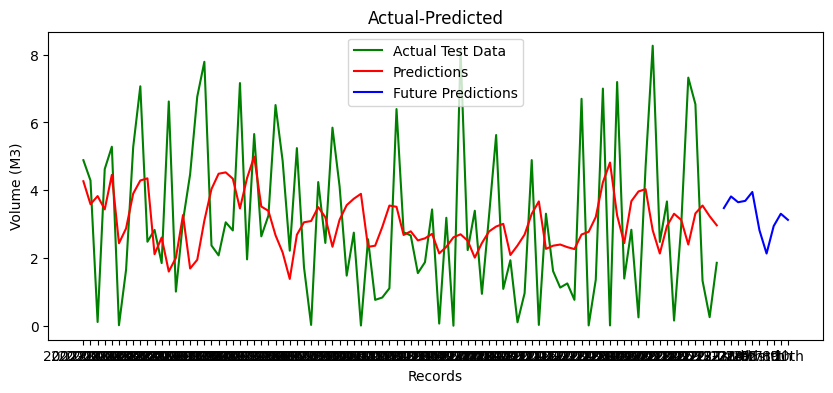

hello
LSTM: 2.370 RMSE (+/- 0.339) cfg_list [3, 200, 100, 32, 5, 0.001]
hello


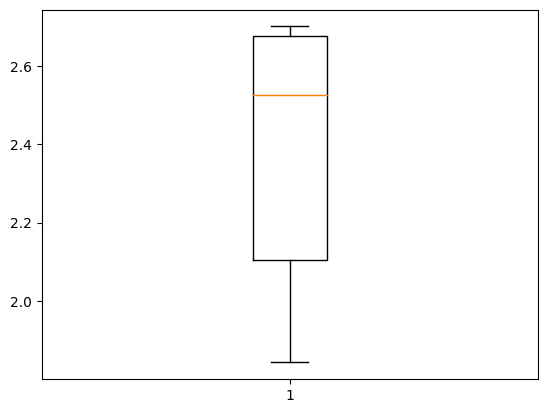

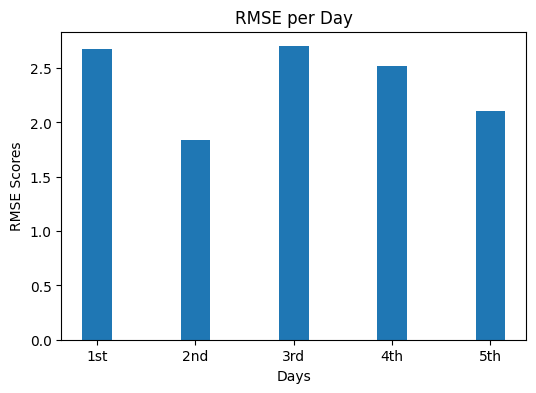

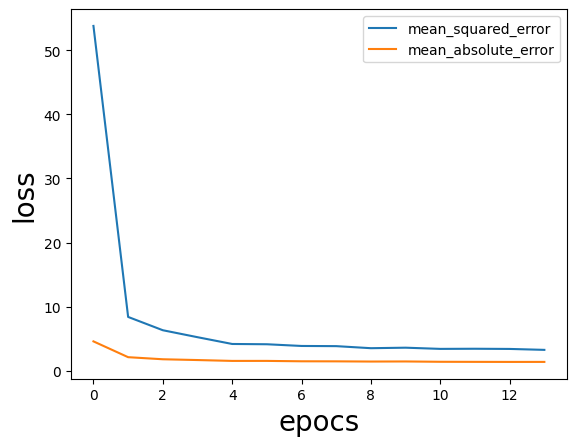

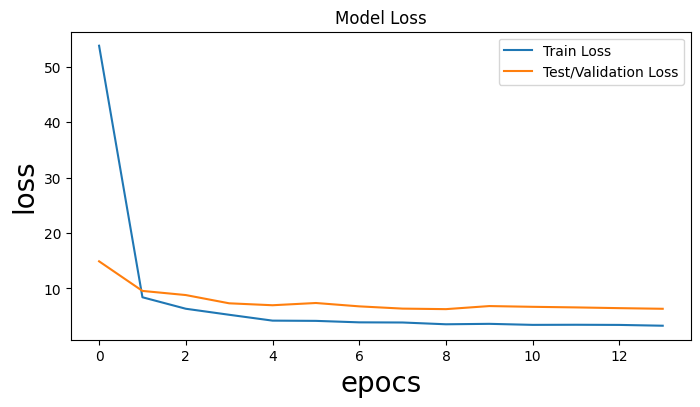

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_13 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_27 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_26 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

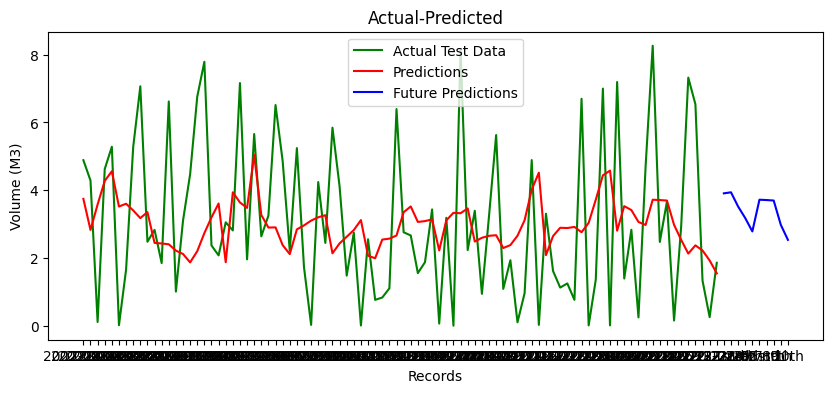

hello
LSTM: 2.361 RMSE (+/- 0.264) cfg_list [3, 200, 100, 32, 5, 0.0001]
hello


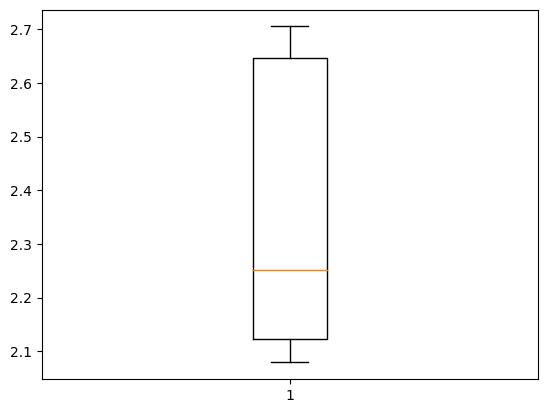

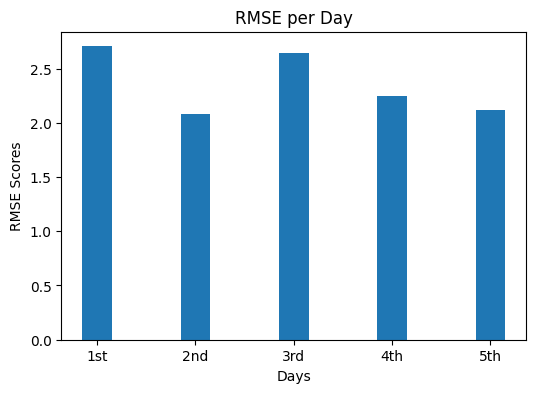

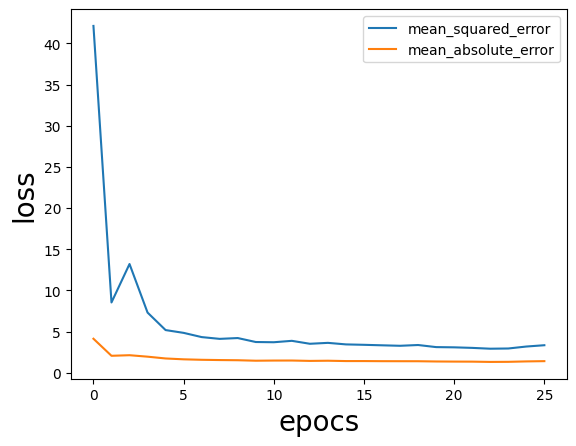

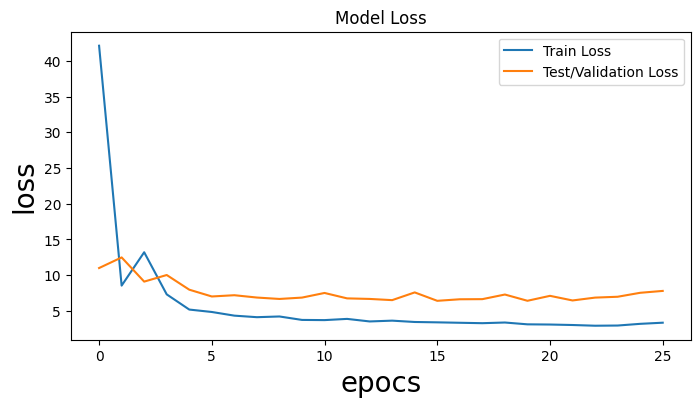

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_14 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_29 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_28 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

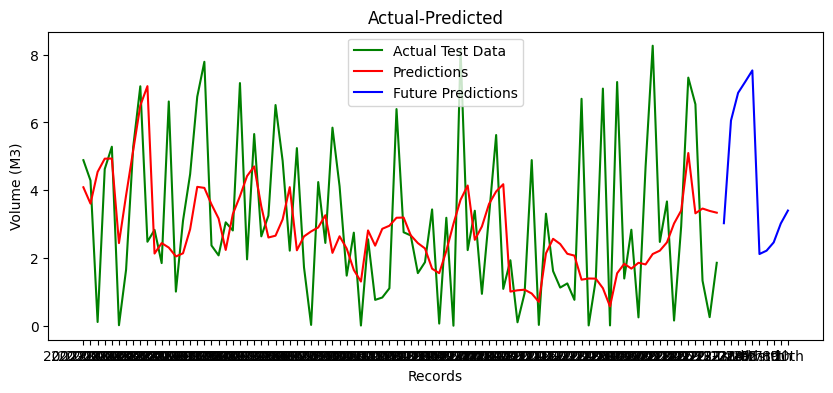

hello
LSTM: 2.239 RMSE (+/- 0.476) cfg_list [3, 200, 100, 32, 10, 0.001]
hello


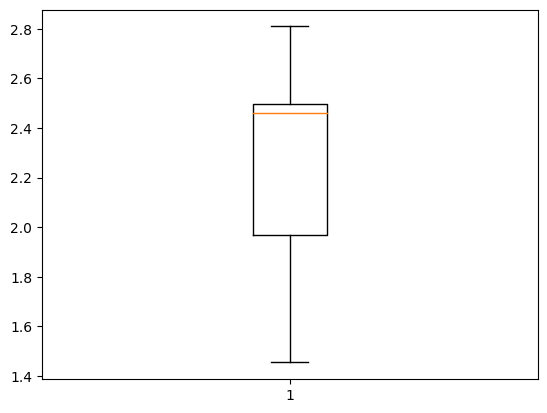

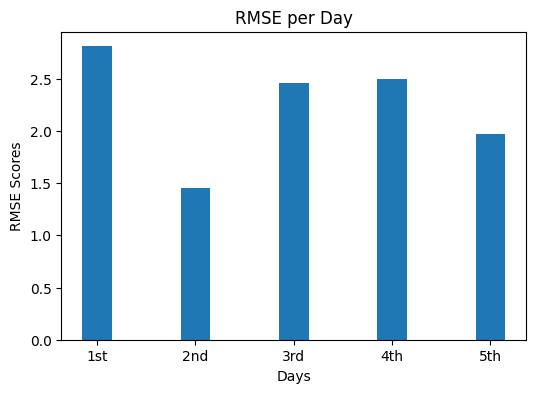

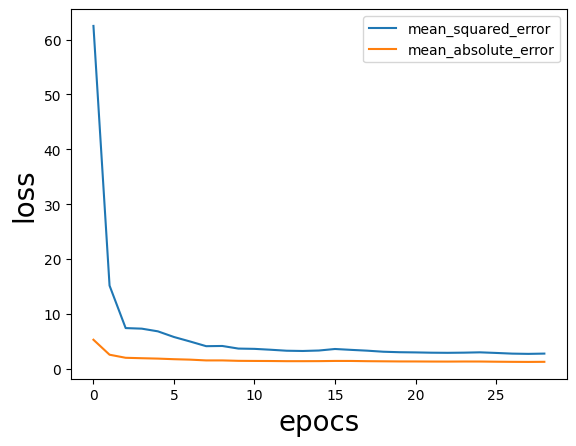

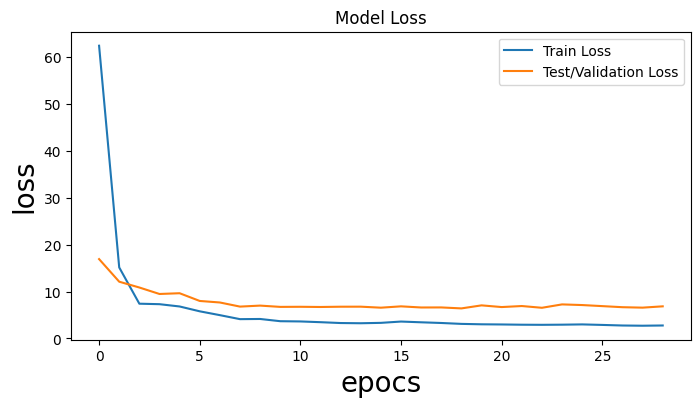

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_15 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_31 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_30 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

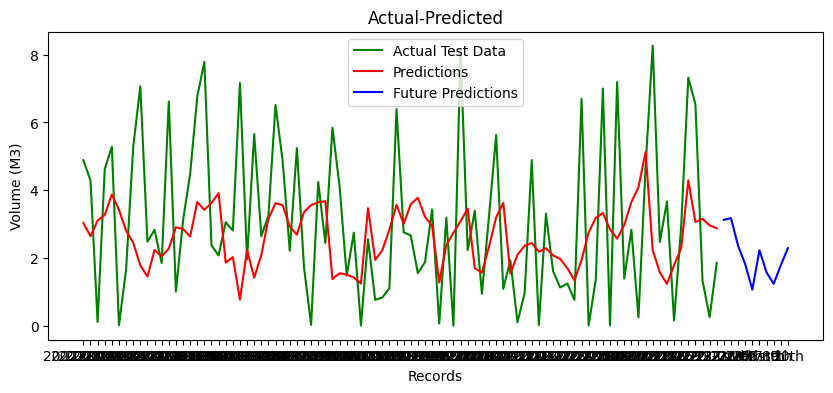

hello
LSTM: 2.358 RMSE (+/- 0.492) cfg_list [3, 200, 100, 32, 10, 0.0001]
hello


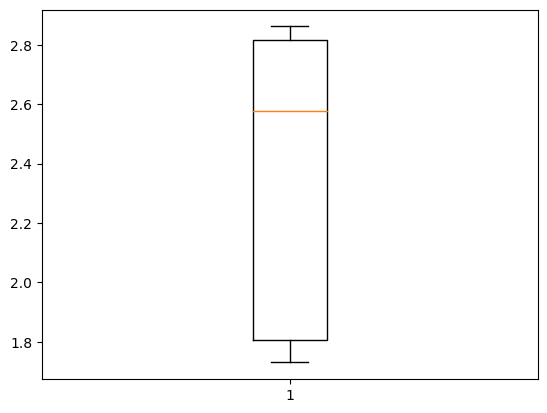

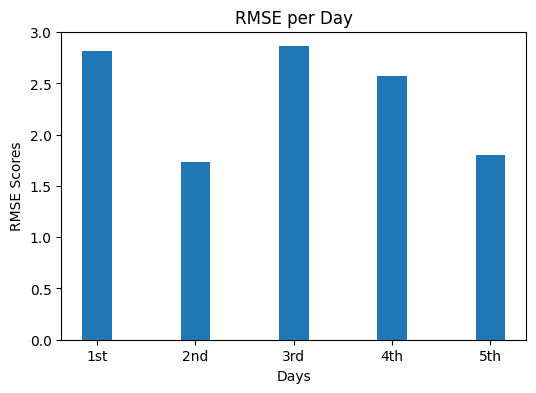

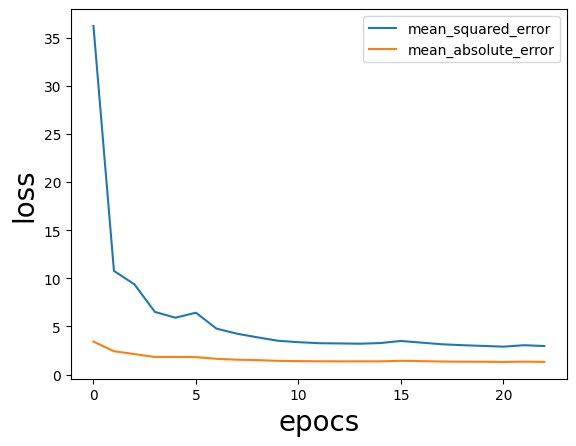

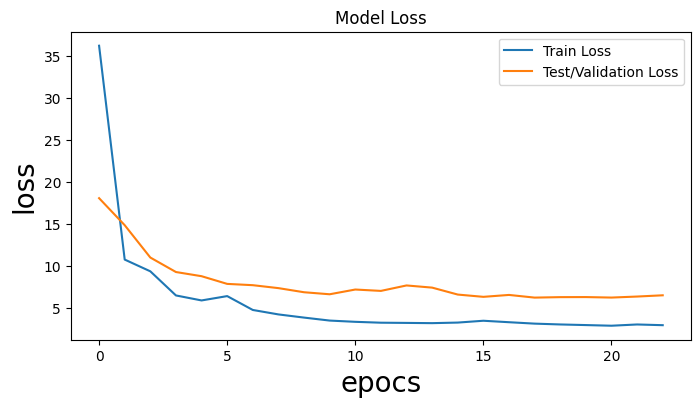

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_16 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_33 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_32 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

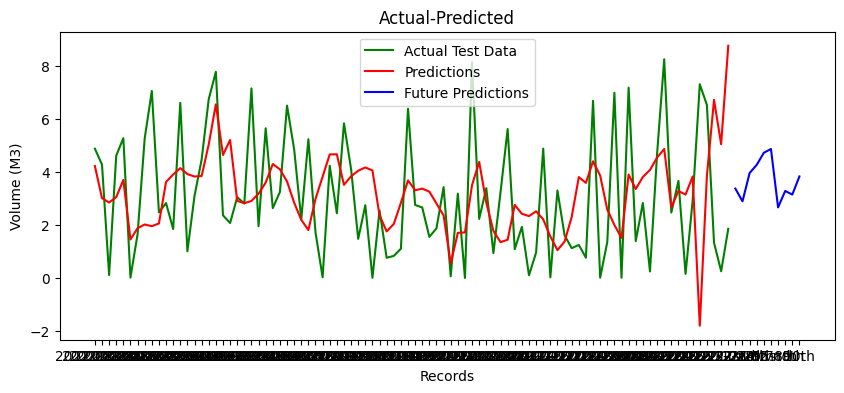

hello
LSTM: 2.531 RMSE (+/- 0.510) cfg_list [5, 100, 100, 16, 5, 0.001]
hello


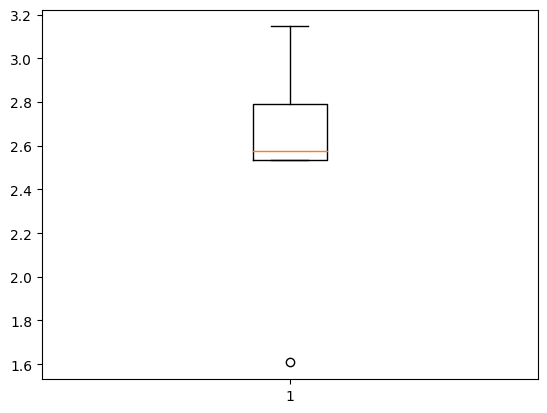

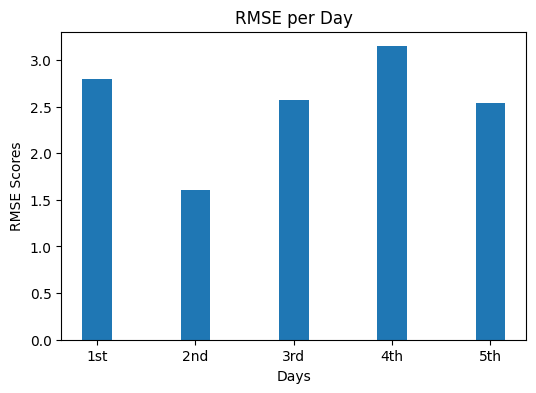

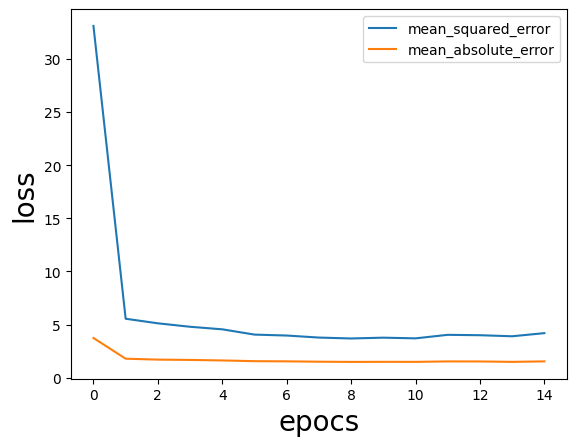

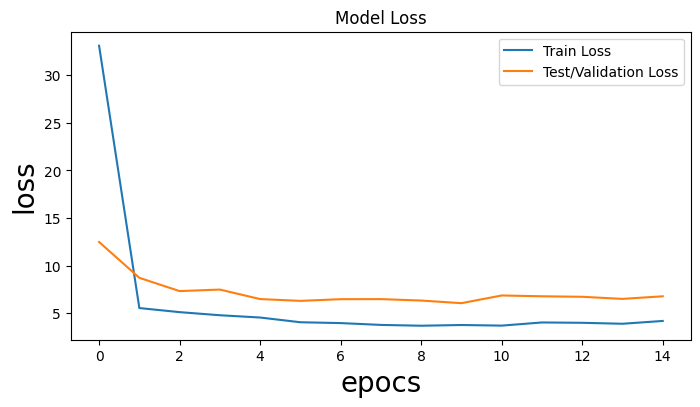

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_17 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_35 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_34 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_35 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

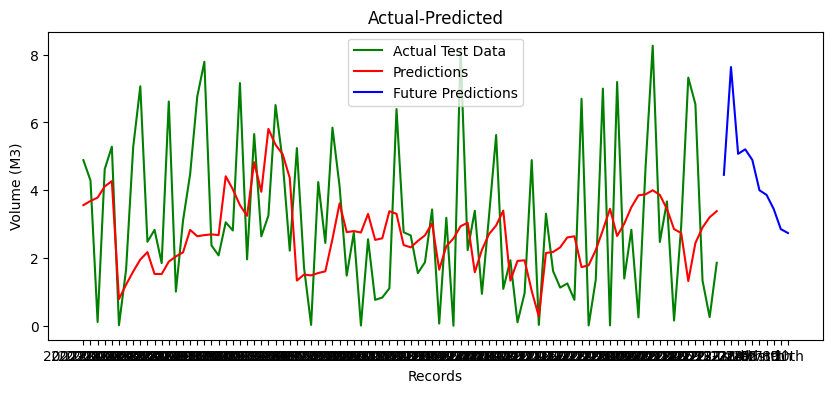

hello
LSTM: 2.315 RMSE (+/- 0.485) cfg_list [5, 100, 100, 16, 5, 0.0001]
hello


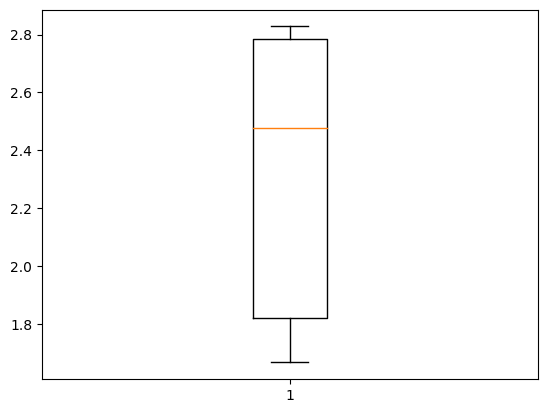

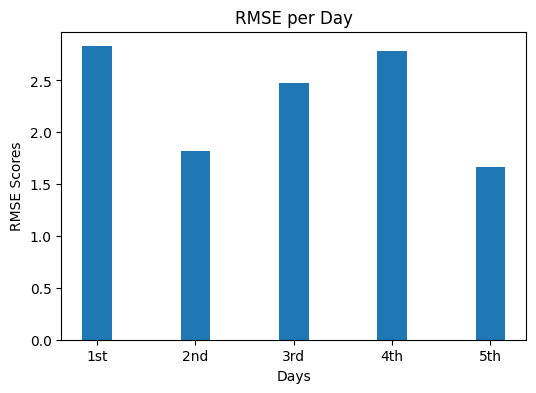

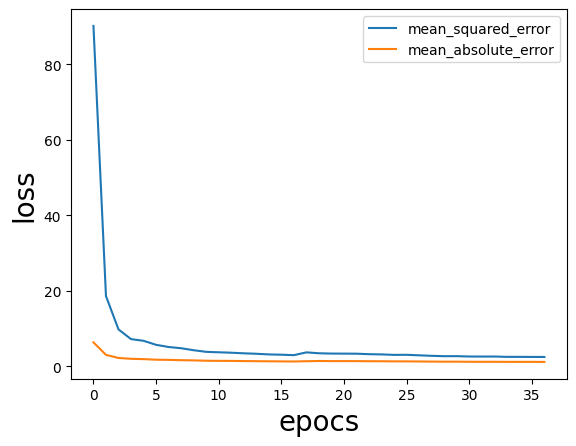

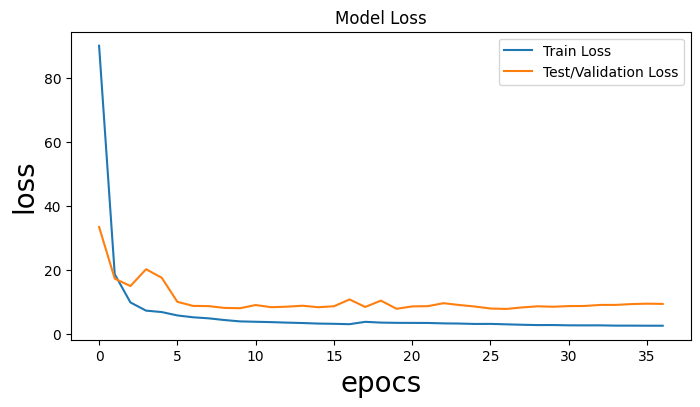

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_18 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_37 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_36 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_37 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

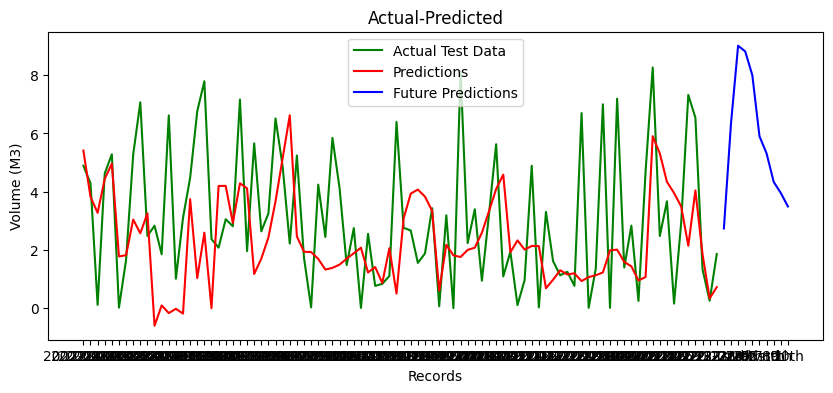

hello
LSTM: 2.592 RMSE (+/- 0.323) cfg_list [5, 100, 100, 16, 10, 0.001]
hello


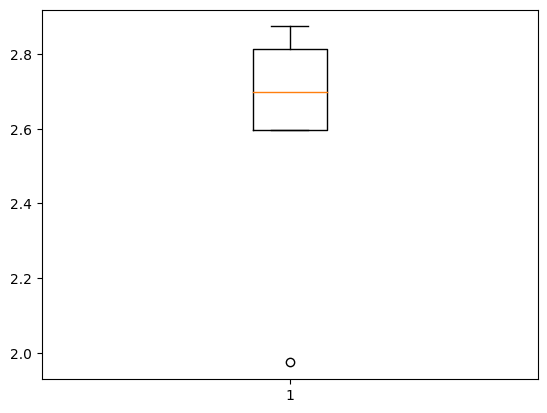

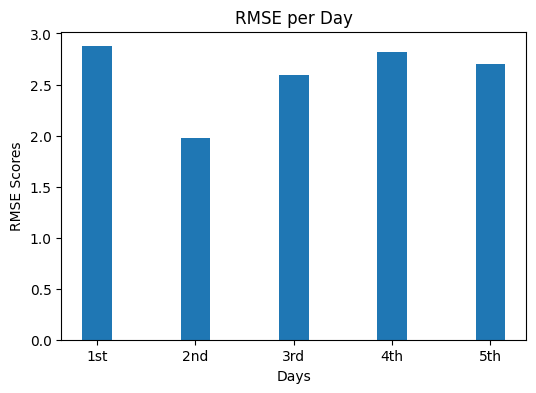

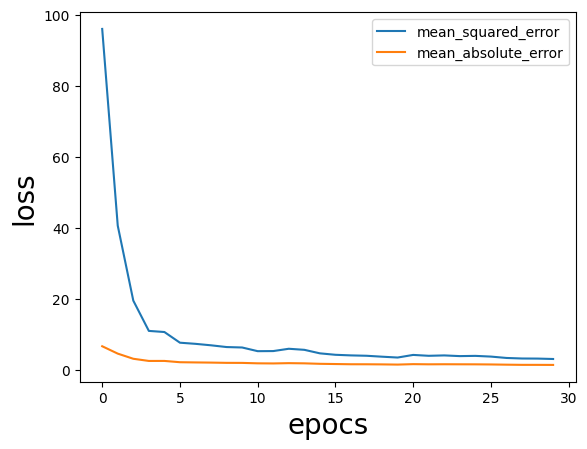

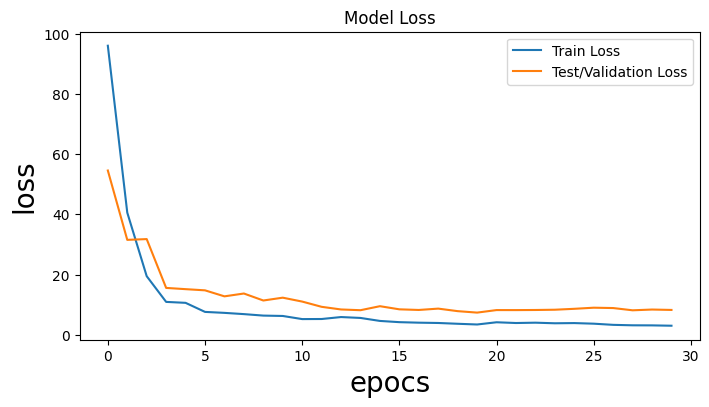

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_19 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_39 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_38 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_39 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

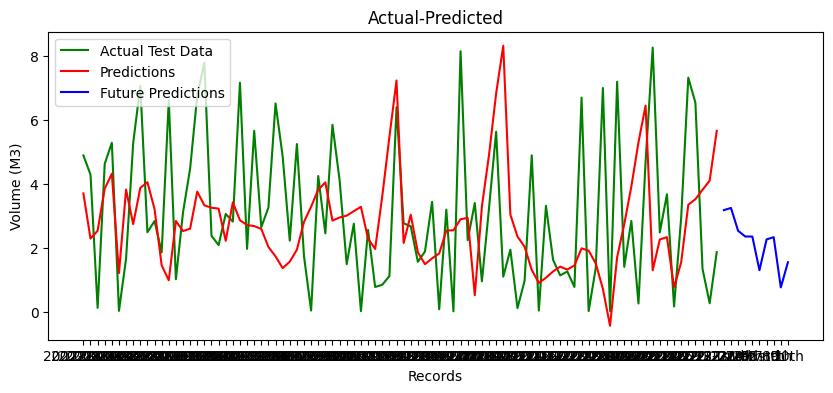

hello
LSTM: 2.597 RMSE (+/- 0.522) cfg_list [5, 100, 100, 16, 10, 0.0001]
hello


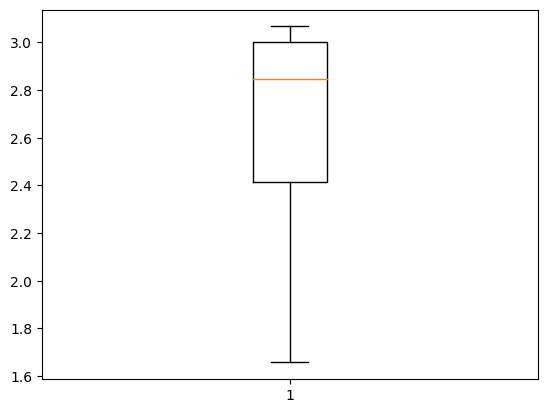

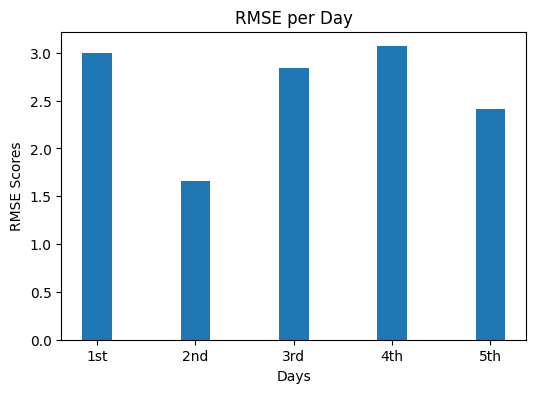

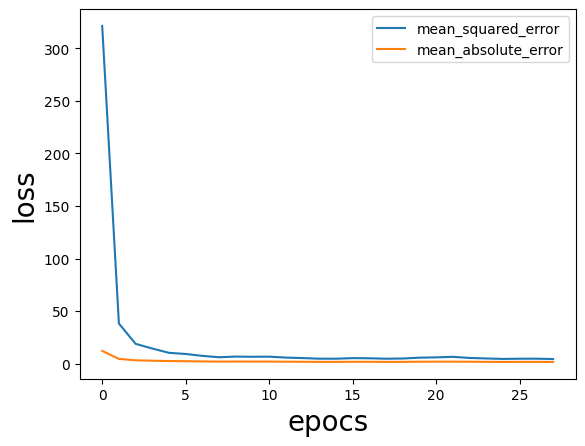

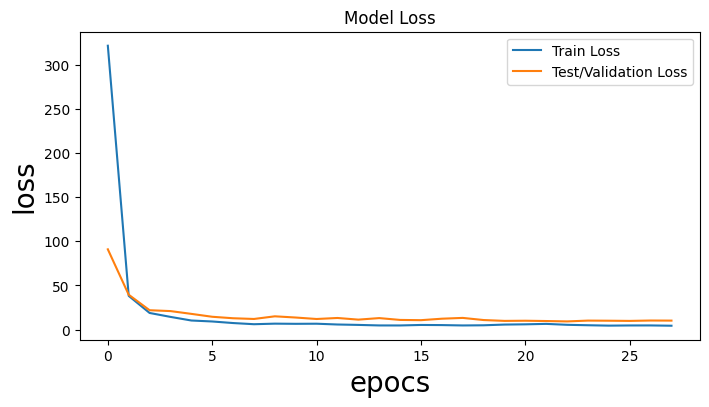

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_20 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_41 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_40 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_41 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

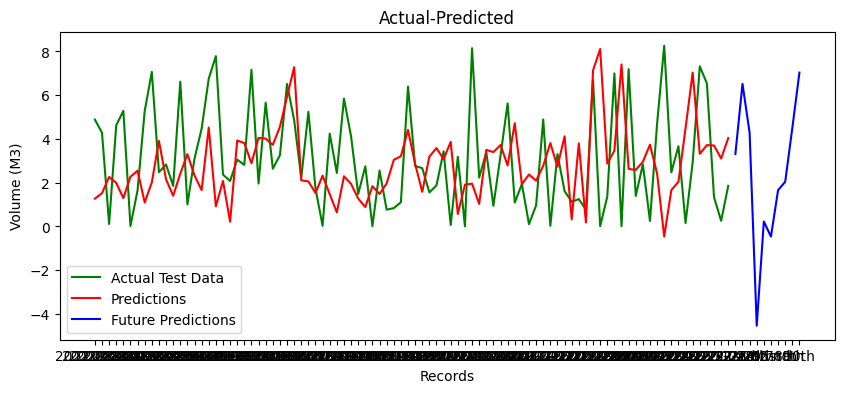

hello
LSTM: 2.898 RMSE (+/- 0.213) cfg_list [5, 100, 100, 32, 5, 0.001]
hello


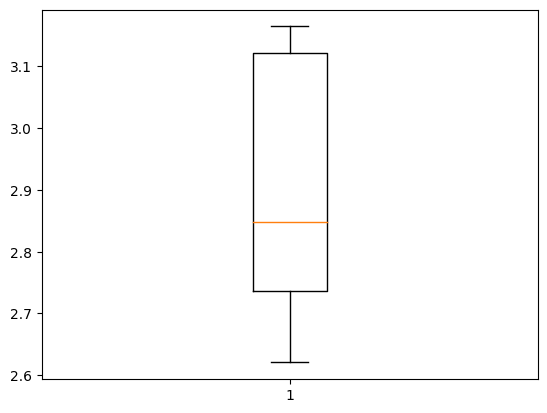

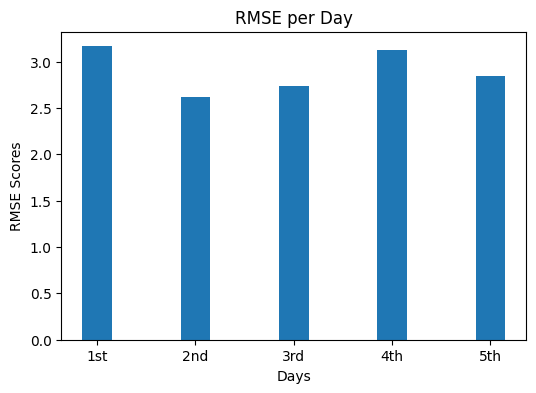

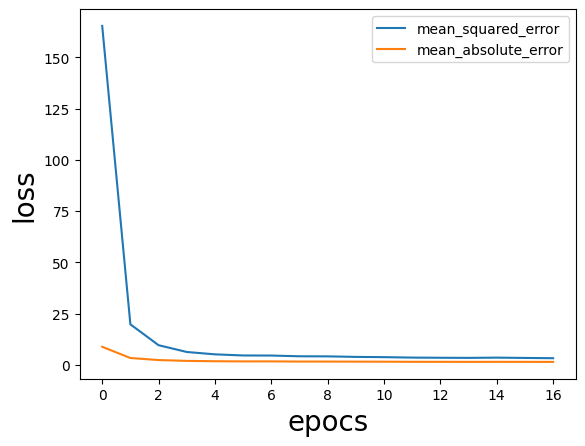

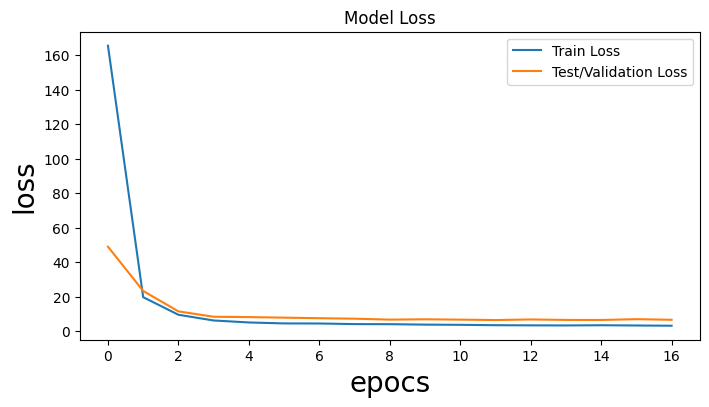

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_21 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_43 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_42 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_43 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

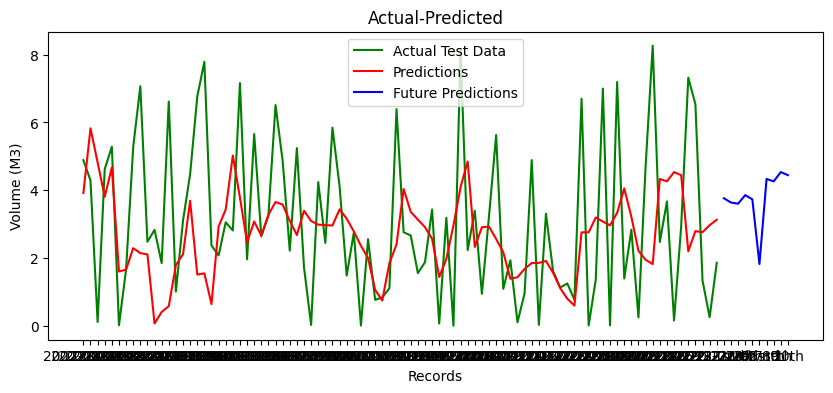

hello
LSTM: 2.432 RMSE (+/- 0.389) cfg_list [5, 100, 100, 32, 5, 0.0001]
hello


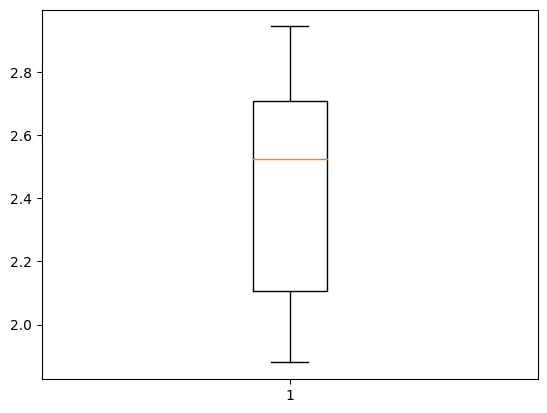

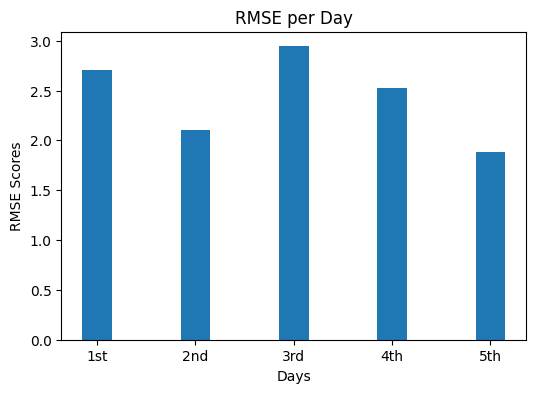

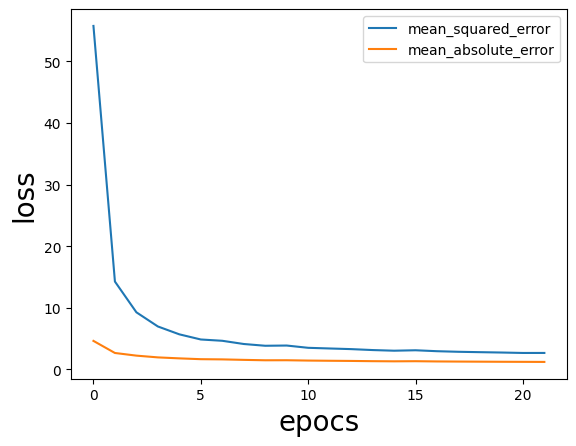

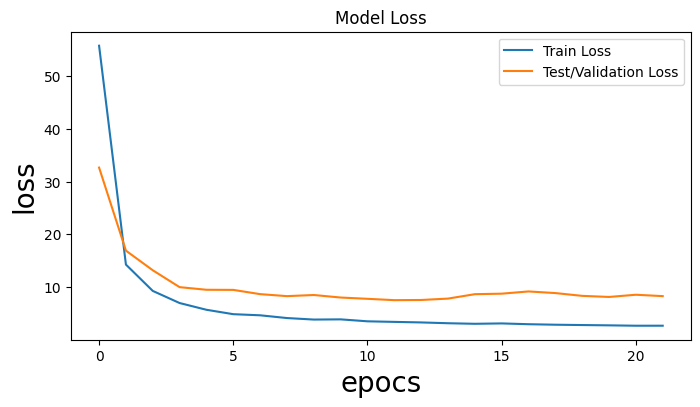

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_22 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_45 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_44 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_45 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

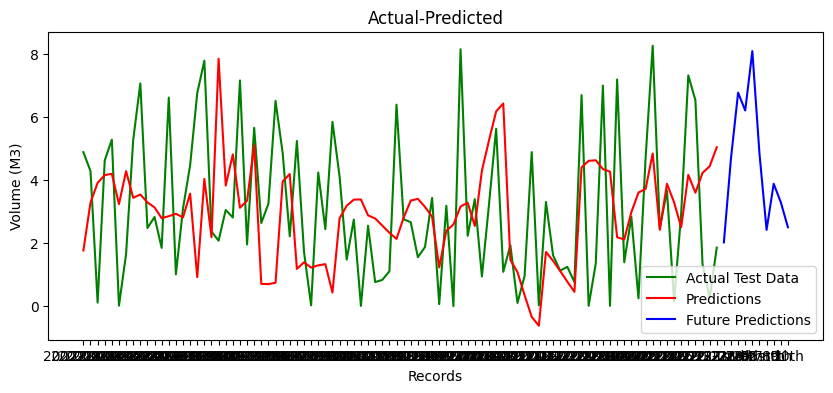

hello
LSTM: 2.636 RMSE (+/- 0.126) cfg_list [5, 100, 100, 32, 10, 0.001]
hello


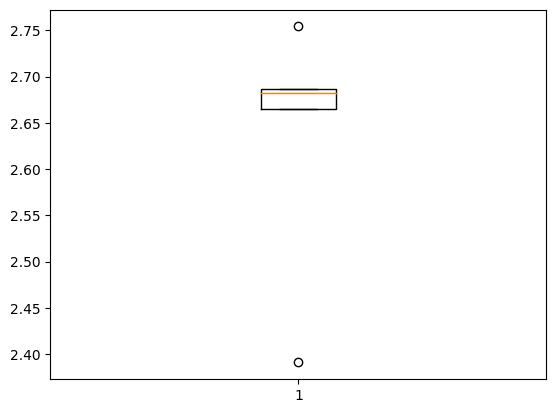

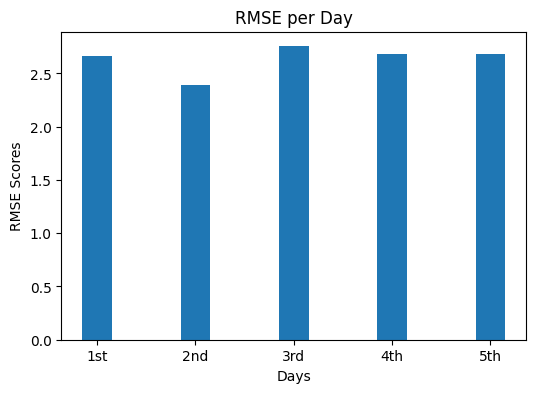

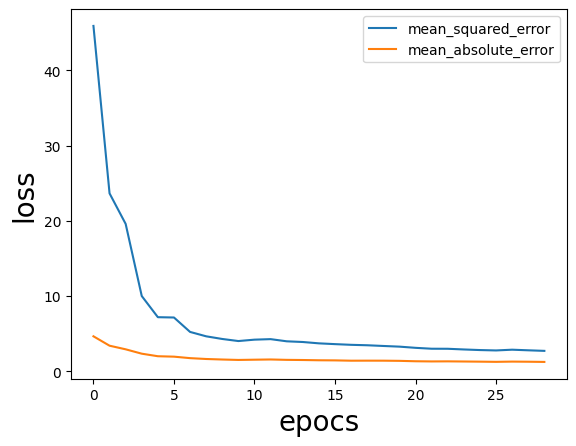

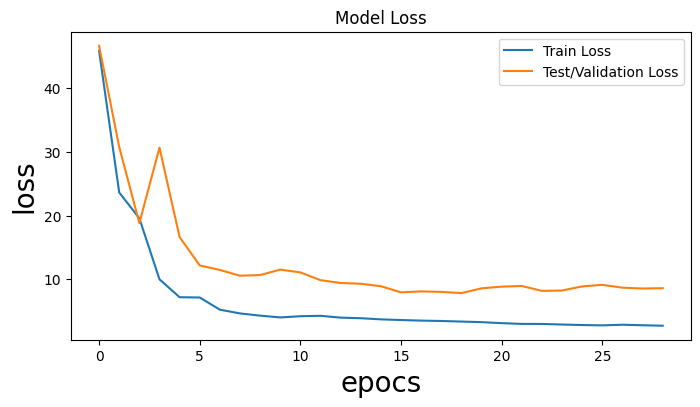

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 100)               43600     
                                                                 
 repeat_vector_23 (RepeatVec  (None, 5, 100)           0         
 tor)                                                            
                                                                 
 lstm_47 (LSTM)              (None, 5, 100)            80400     
                                                                 
 time_distributed_46 (TimeDi  (None, 5, 100)           10100     
 stributed)                                                      
                                                                 
 time_distributed_47 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

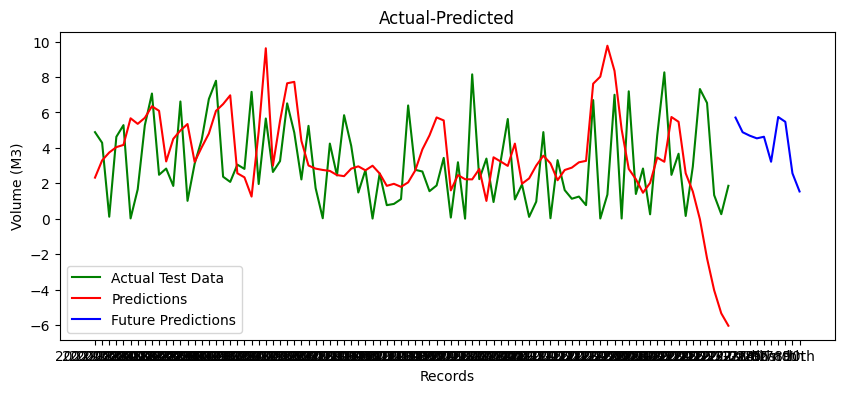

hello
LSTM: 3.206 RMSE (+/- 0.168) cfg_list [5, 100, 100, 32, 10, 0.0001]
hello


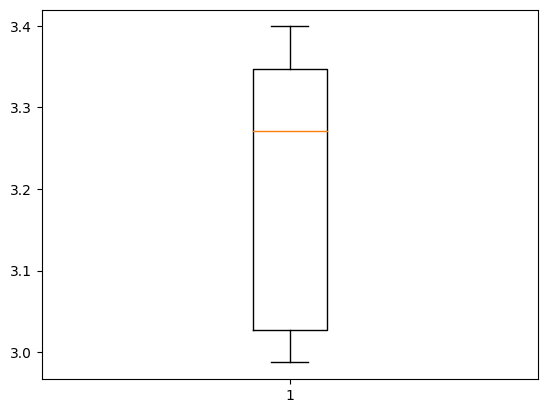

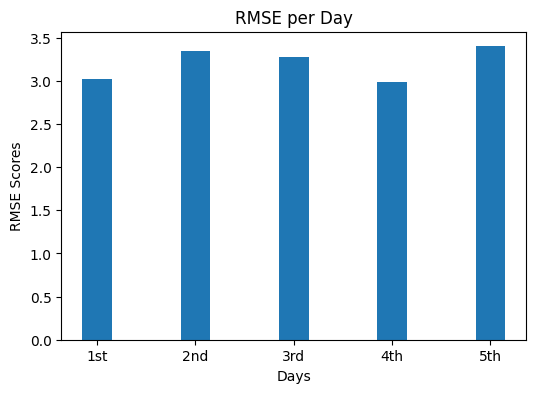

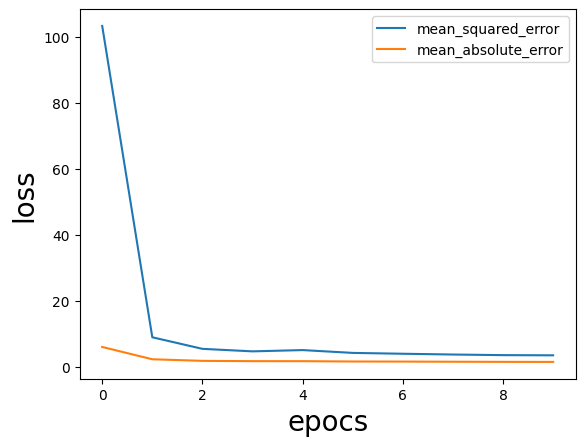

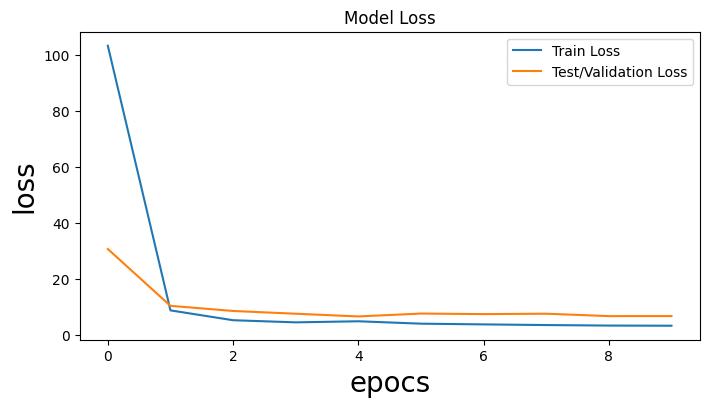

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_24 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_49 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_48 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

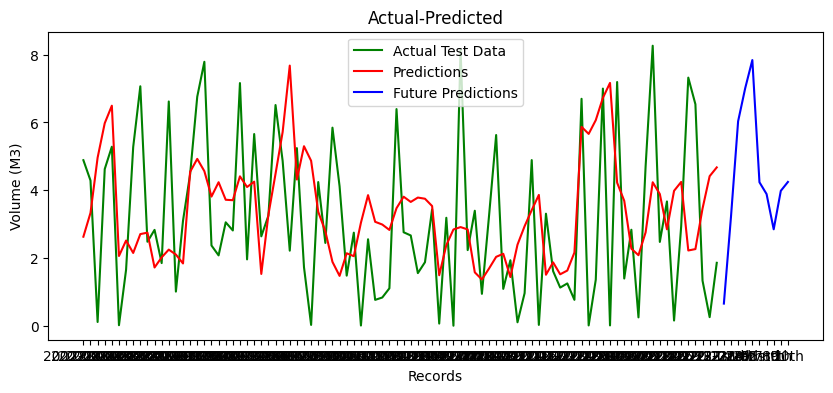

hello
LSTM: 2.553 RMSE (+/- 0.252) cfg_list [5, 200, 100, 16, 5, 0.001]
hello


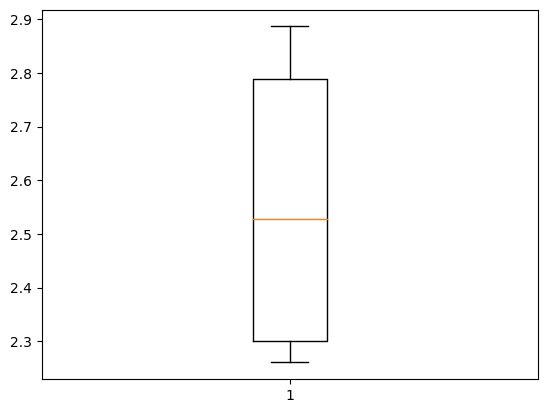

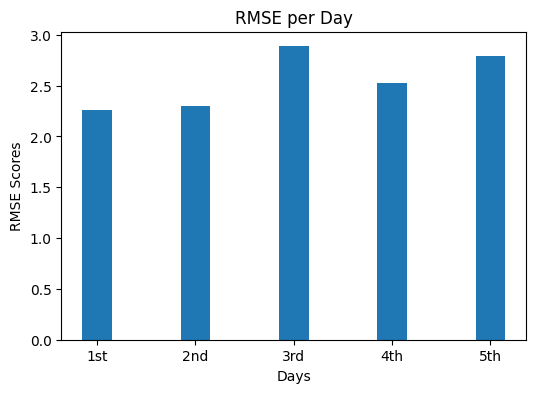

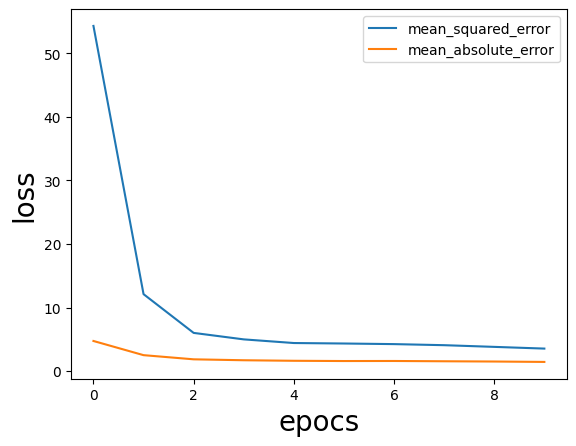

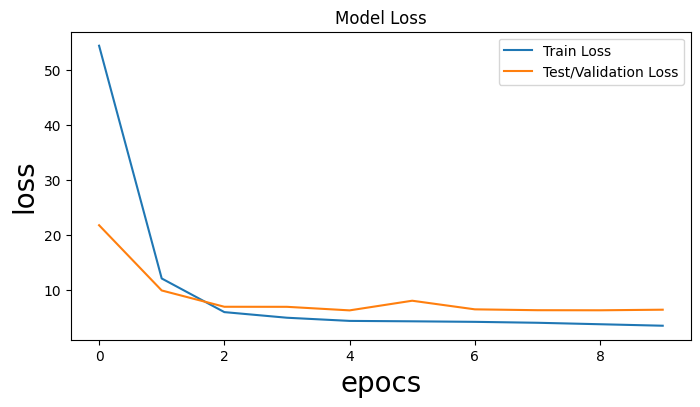

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_25 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_51 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_50 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_51 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

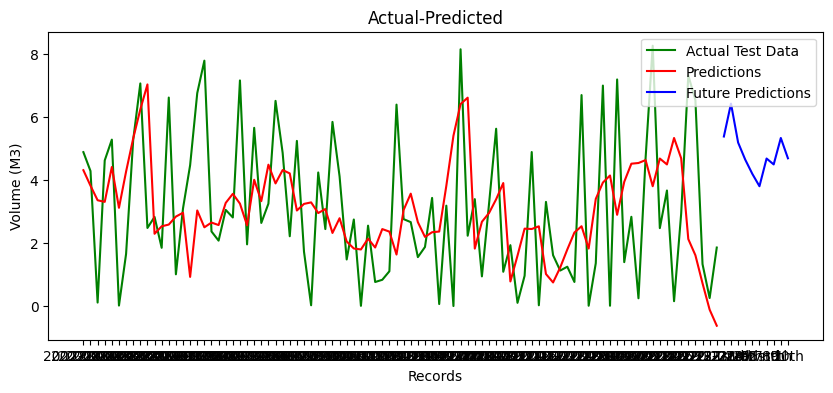

hello
LSTM: 2.434 RMSE (+/- 0.304) cfg_list [5, 200, 100, 16, 5, 0.0001]
hello


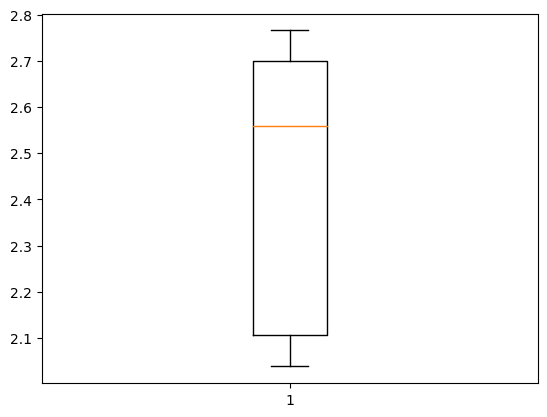

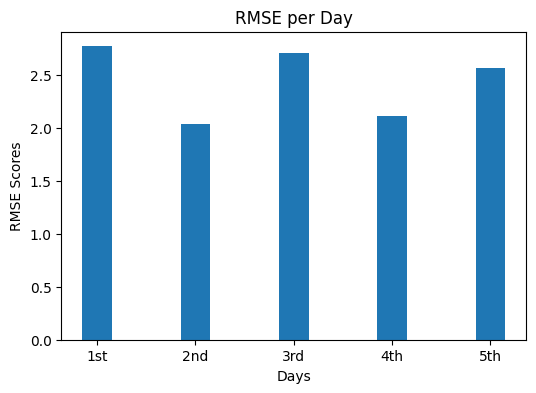

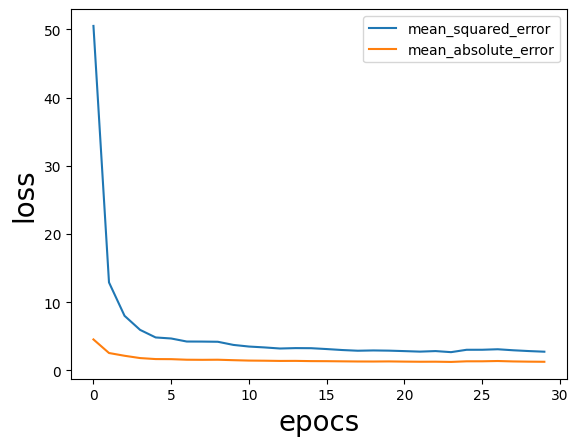

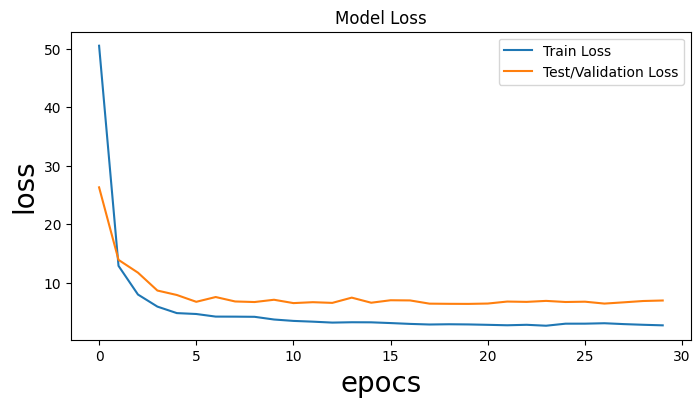

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_26 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_53 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_52 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

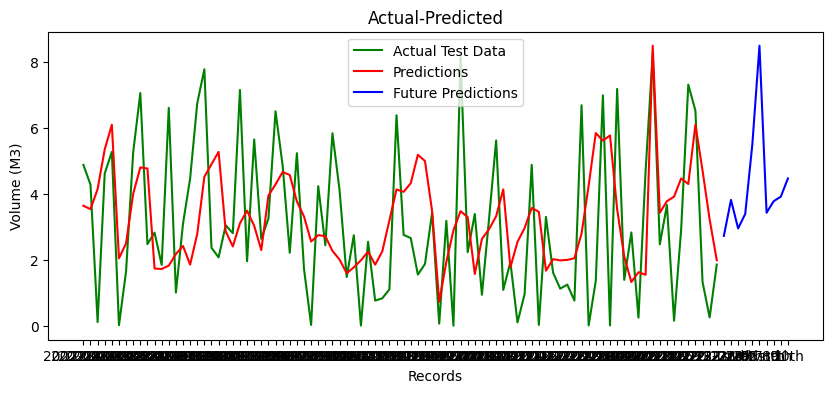

hello
LSTM: 2.264 RMSE (+/- 0.342) cfg_list [5, 200, 100, 16, 10, 0.001]
hello


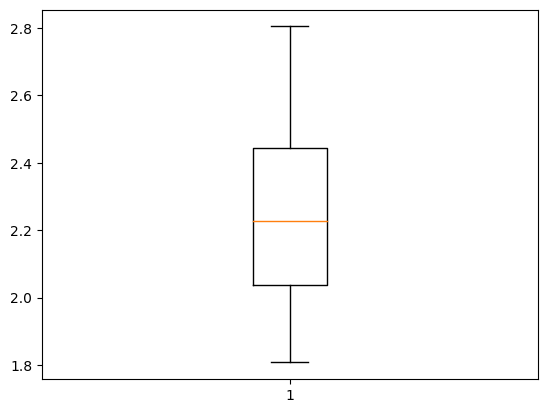

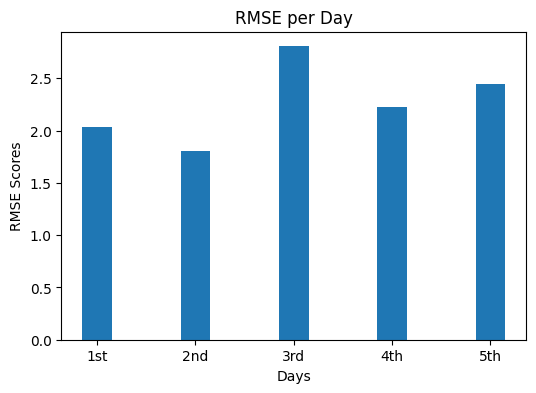

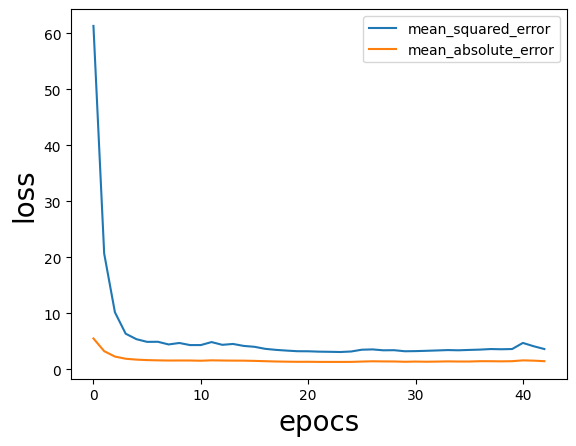

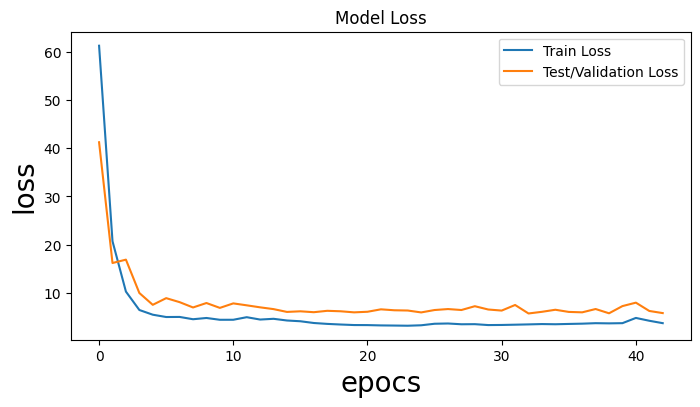

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_27 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_55 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_54 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_55 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

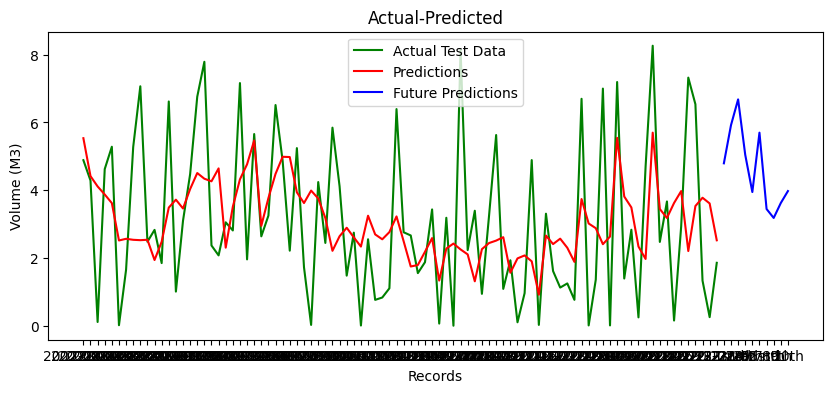

hello
LSTM: 2.116 RMSE (+/- 0.436) cfg_list [5, 200, 100, 16, 10, 0.0001]
hello


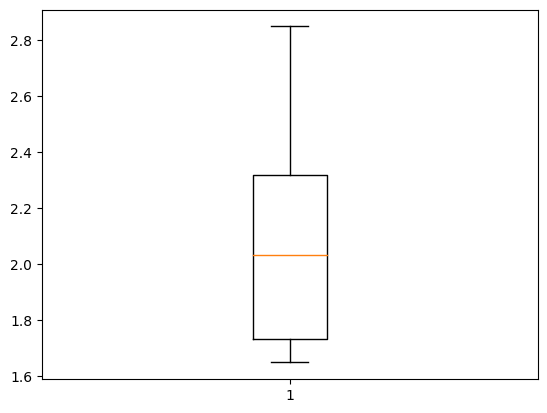

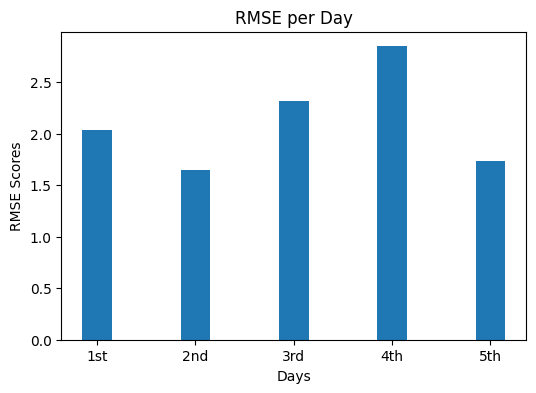

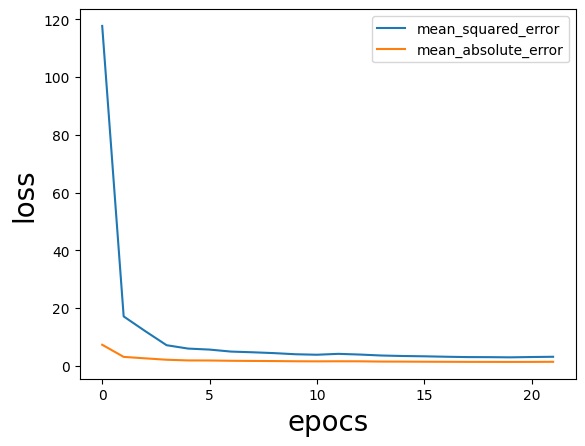

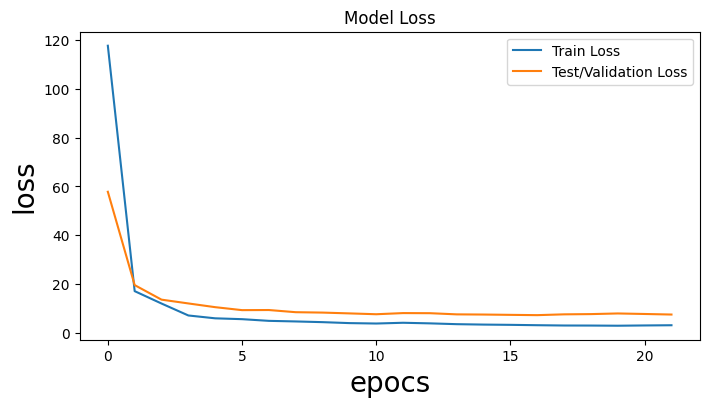

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_28 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_57 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_56 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_57 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

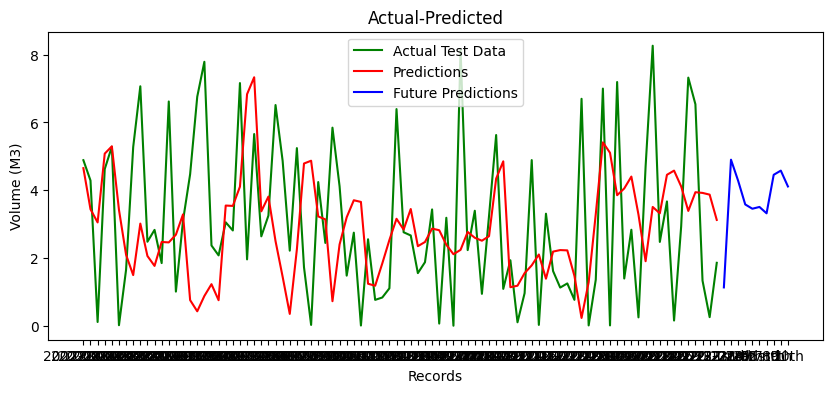

hello
LSTM: 2.644 RMSE (+/- 0.420) cfg_list [5, 200, 100, 32, 5, 0.001]
hello


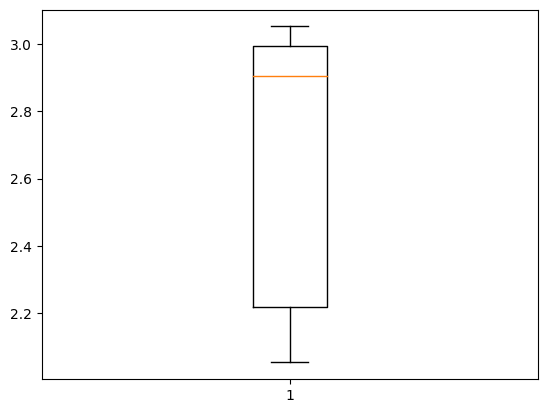

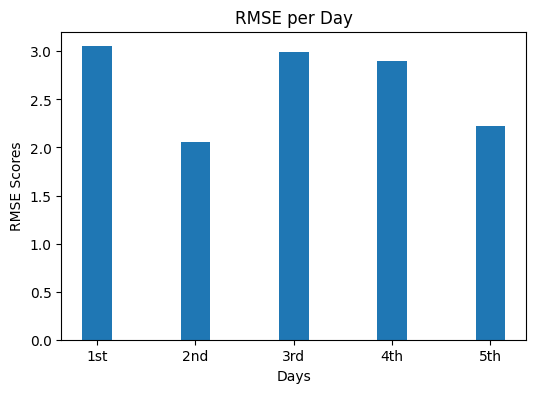

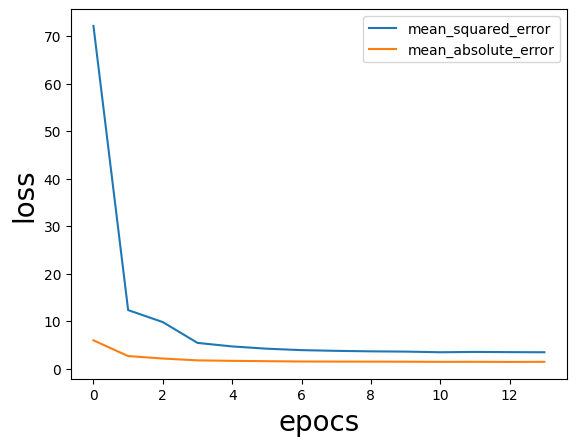

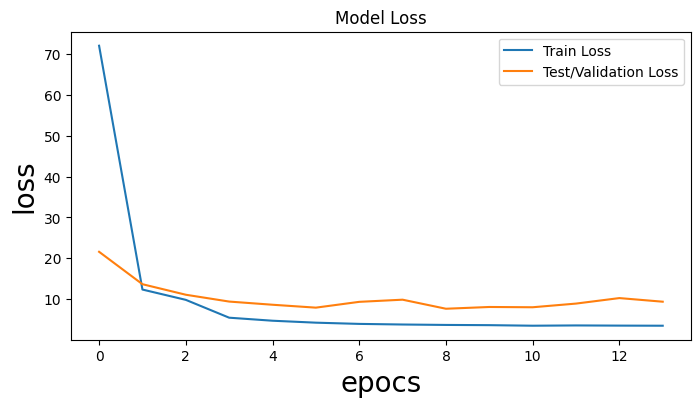

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_29 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_59 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_58 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_59 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

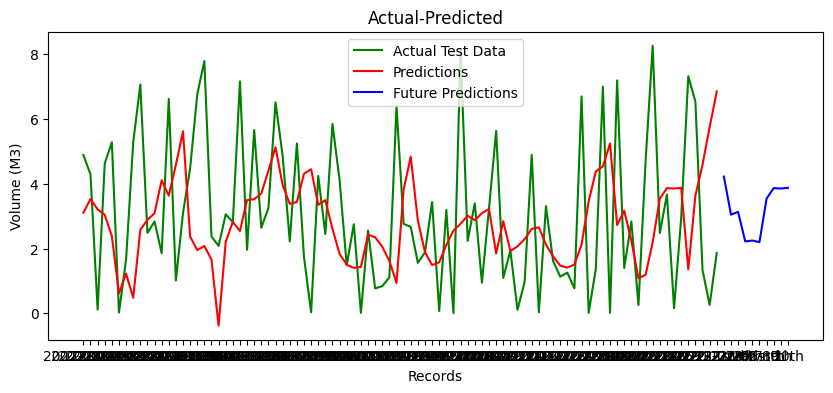

hello
LSTM: 2.685 RMSE (+/- 0.267) cfg_list [5, 200, 100, 32, 5, 0.0001]
hello


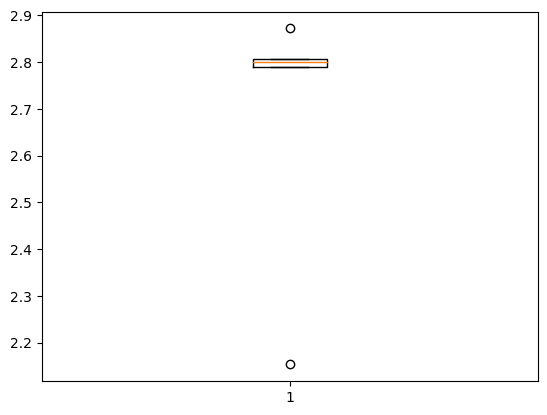

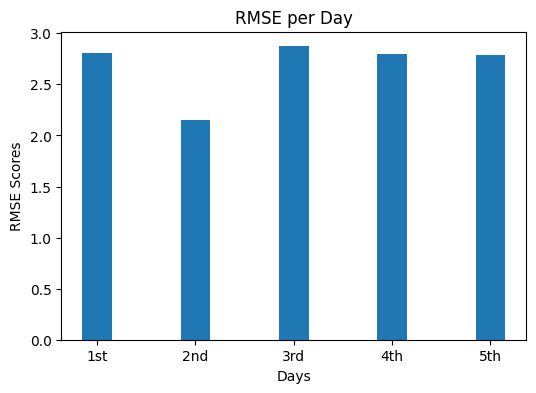

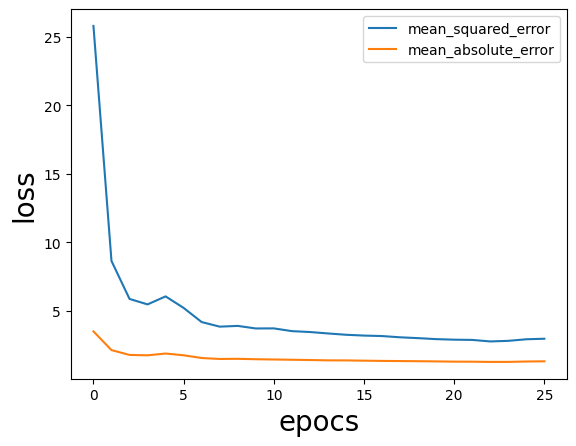

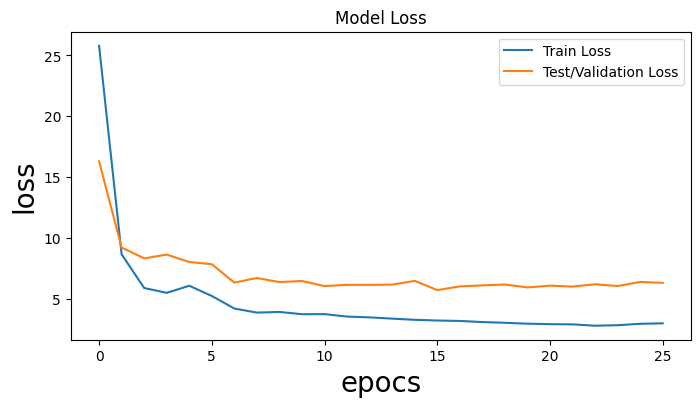

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_30 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_61 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_60 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_61 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

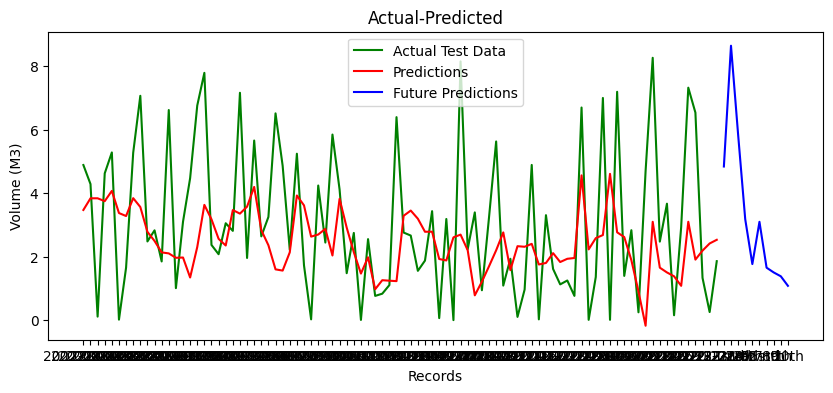

hello
LSTM: 2.351 RMSE (+/- 0.271) cfg_list [5, 200, 100, 32, 10, 0.001]
hello


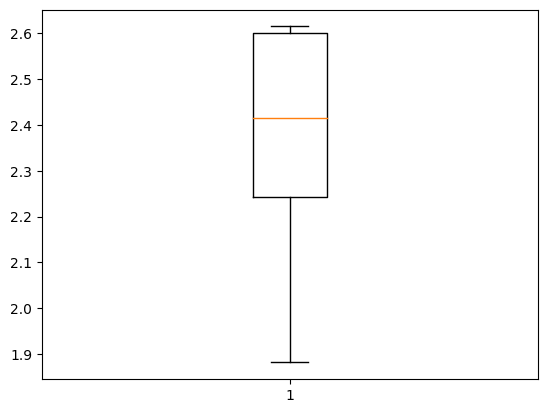

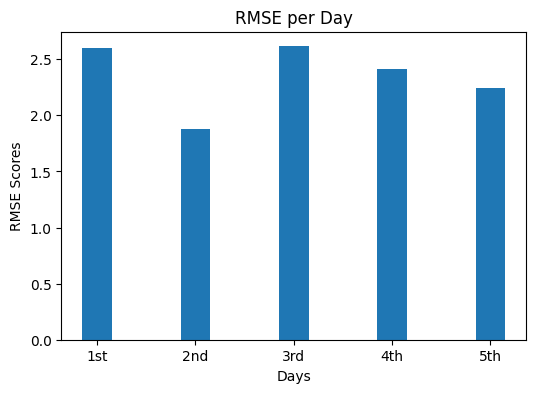

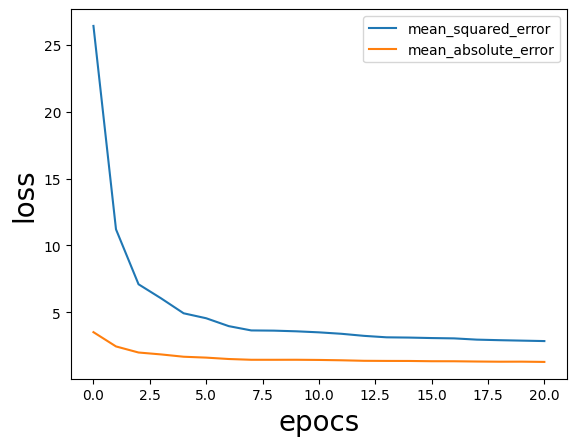

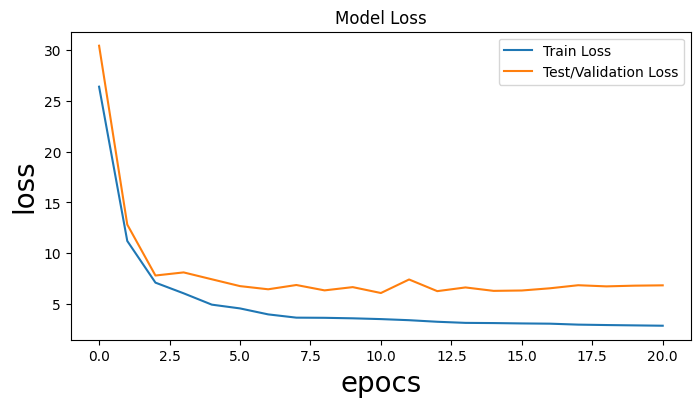

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 200)               167200    
                                                                 
 repeat_vector_31 (RepeatVec  (None, 5, 200)           0         
 tor)                                                            
                                                                 
 lstm_63 (LSTM)              (None, 5, 200)            320800    
                                                                 
 time_distributed_62 (TimeDi  (None, 5, 100)           20100     
 stributed)                                                      
                                                                 
 time_distributed_63 (TimeDi  (None, 5, 1)             101       
 stributed)                                                      
                                                     

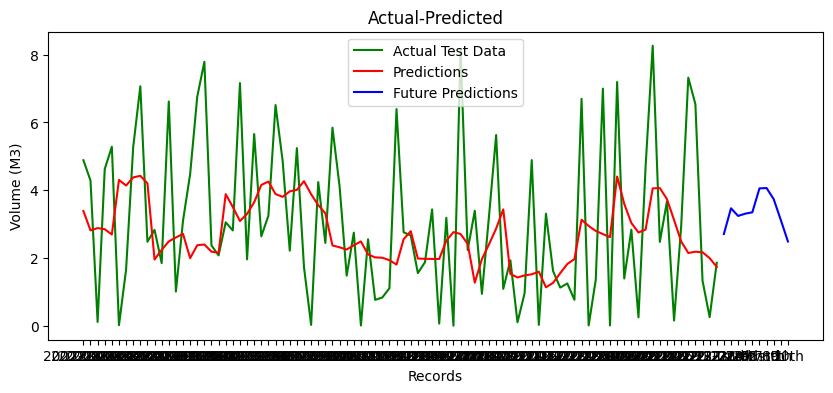

hello
LSTM: 2.288 RMSE (+/- 0.245) cfg_list [5, 200, 100, 32, 10, 0.0001]
hello


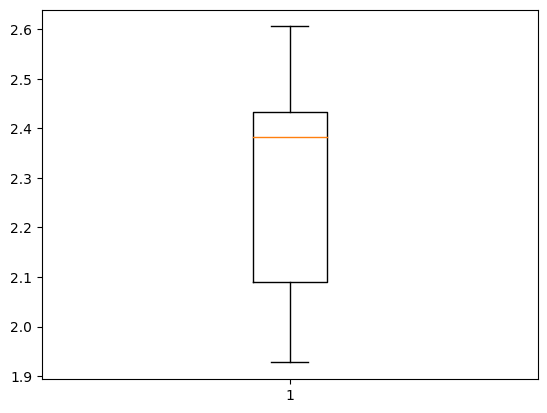

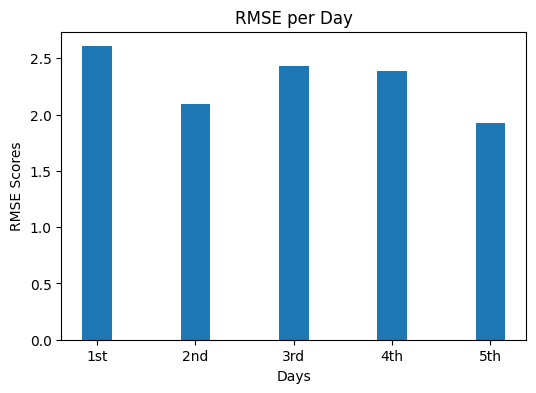

{'name': 'LSTM', 'score_mean': 2.1163667482609343, 'cfg_list': [5, 200, 100, 16, 10, 0.0001]}
{'name': 'LSTM', 'score_mean': 2.23878064385074, 'cfg_list': [3, 200, 100, 32, 10, 0.001]}
{'name': 'LSTM', 'score_mean': 2.251048026925111, 'cfg_list': [3, 200, 100, 16, 10, 0.0001]}
{'name': 'LSTM', 'score_mean': 2.2637223805931144, 'cfg_list': [5, 200, 100, 16, 10, 0.001]}
{'name': 'LSTM', 'score_mean': 2.284899180266251, 'cfg_list': [3, 200, 100, 16, 5, 0.0001]}
{'name': 'LSTM', 'score_mean': 2.2878138008469384, 'cfg_list': [5, 200, 100, 32, 10, 0.0001]}
{'name': 'LSTM', 'score_mean': 2.3145112473321503, 'cfg_list': [5, 100, 100, 16, 5, 0.0001]}
{'name': 'LSTM', 'score_mean': 2.3160352322486686, 'cfg_list': [3, 200, 100, 16, 5, 0.001]}
{'name': 'LSTM', 'score_mean': 2.327118562414328, 'cfg_list': [3, 100, 100, 32, 5, 0.001]}
{'name': 'LSTM', 'score_mean': 2.350821035581541, 'cfg_list': [5, 200, 100, 32, 10, 0.001]}
{'name': 'LSTM', 'score_mean': 2.3584409626431, 'cfg_list': [3, 200, 100, 3

In [ ]:
# split dataset into standard bulks
# 0.20-testing dataset, 0.80-training dataset 
p=0.20
bulks=5  #in every bulk 5 sample will be stored
n=int(len(df_input)-len(df_input)*p)
k=int(n%bulks)      #remaining
t=n-k       #training dataset reach until this place
s=int(len(df_input)-t)%bulks        #last remanining
  
# take 'Date' column
train, test = df_input[0:t], df_input[t:]
test_date=test['Date']
#print("test_date",test_date)

# eliminate the 'Date' column
df_input=df_input[['Volume', 'Gross_Weight', 'Day_dif', 'Week_Number', 'Months', 'Year_encoded', 'Season_encoded', 'Day_encoded']]

# split into train and test
train, test = split_dataset(df_input,t)

# model configs
cfg_lists = model_configs()

#idetify one empty tuple
results=()
# evaluate model and get scores
for cfg_list in cfg_lists:
  score, scores, predicted_1d, model, cfg_list= evaluate_model(train, test, cfg_list, test_date)

  # summarize scores
  summary=summarize_scores('LSTM', score, scores, cfg_list)
  
  # add summary variable values to the tuple
  results += (summary,)

  # plot scores
  days = ['1st', '2nd', '3rd', '4th', '5th']   #the size of the bulks which we mentioned while spliting the dataset at the begining and the the day numbers should be equal
  fig = pyplot.figure(figsize=(6, 4))
  pyplot.bar(days, scores, width=0.3, label='LSTM')
  # Add labels and title
  plt.xlabel('Days')
  plt.ylabel('RMSE Scores')
  plt.title('RMSE per Day')
  pyplot.show()

sorted_summaries=sorted(results, key=lambda x: x["score_mean"])
for i, summary in enumerate(sorted_summaries):
  print(summary)